In [7]:
%run setup.py

In [4]:
from scipy.interpolate import interp1d
import rotation_matrix
from ugali.utils.projector import angsep

In [6]:
# CLUSTER COORDS
ra_pal13, dec_pal13 = 346.685, 12.772
r_pal13 = 6.7/60. # jacobi radius from Bradford+2013 https://arxiv.org/pdf/1110.0484.pdf
print(r_pal13)


# TRACK
track = [[-15.565158278830129, 9.145015179988334], [-14.881249805204186, 9.873014086896049], [-14.53725784224214, 10.956851911047934], [-13.731111722451066, 11.824486548597307], [-13.373216530635766, 12.645598497803462], [-12.198346421088706, 14.068007512069045], [-11.590156400814827, 15.172339805750198], [-10.808168892877427, 16.02910634268146], [-10.175911928488054, 16.87124879970905], [-9.804650620987337, 17.42797474620764]]
ra_track, dec_track = [[ i for i, j in track ], 
                       [ j for i, j in track ]]


# MATRIX
reload(streamlib)
import results
reload(results)

ends = [[ra_track[0], dec_track[0]],[ra_track[-1], dec_track[-1]]]
R = np.array(streamlib.get_rotmat(ends=ends, center=(ra_pal13, dec_pal13)))

# ends = [[ra_track[-1], dec_track[-1]],[ra_track[0], dec_track[0]]]
# R1 = np.array(streamlib.get_rotmat(ends=ends, center=(ra_pal13, dec_pal13)))

# Rnew = [[ 0.95,  -0.222,  0.219],
#         [ 0.05,  -0.585, -0.81 ],
#         [-0.308, -0.78,   0.545]]

Rnew = np.copy(R)
Rnew[-2] *= -1
print(Rnew)

R = Rnew

###############

phi1_track, phi2_track = rotation_matrix.phi12_rotmat(np.asarray(ra_track), np.asarray(dec_track), R)
interp_track = interp1d(phi1_track, phi2_track, fill_value='extrapolate')

ra_plot, dec_plot = rotation_matrix.phi12_rotmat(np.array([-5, -1, 1, 5]), np.array([0.25]*4), np.linalg.inv(R))
length = angsep(ends[0][0], ends[0][1], ends[1][0], ends[1][1])
print('length = %.2f deg' %length)

../code/streamlib.py:55: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(open(STREAMFILE, 'r'))


0.11166666666666666
158.43563675417076 122.99325234497584 164.83377697716446
[[ 0.94997566 -0.22225376  0.21942997]
 [-0.05013533  0.58494449  0.80952232]
 [ 0.30827374  0.7800277  -0.54454026]]
length = 10.00 deg


../code/streamlib.py:55: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/nora/projects/stream_search/data/streams_v6.0.yaml' mode='r' encoding='UTF-8'>
  return yaml.load(open(STREAMFILE, 'r'))
../code/results.py:201: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return [np.asscalar(lon), np.asscalar(lat)]
../code/results.py:201: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return [np.asscalar(lon), np.asscalar(lat)]
../code/rotation_matrix.py:77: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  vec_phi12[0] = np.sum(R_phi12_radec[0][i]*vec_radec[i] for i in range(3))
../code/rotation_matrix.py:78: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the pytho

13.0 13.047961797466591 0.009376918838741685
Reading /Users/nora/projects/stream_search/data/DECaLS_iso_hpxcube_z0.0010_a11.0_gmax23.fits.gz...
Reading ../data/DECaLS_nside128.fits.gz...
[0.47626631 0.43731592 0.41702397 0.37493018] [-5.37948931e-02 -7.54463737e-05  2.67956984e-02  8.03971791e-02]


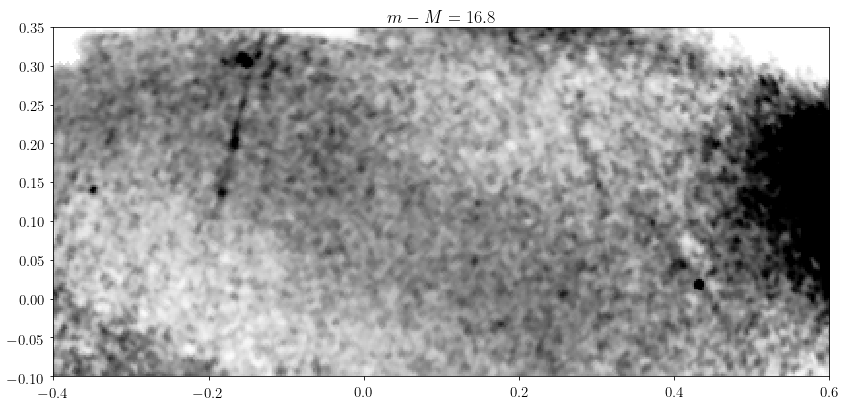

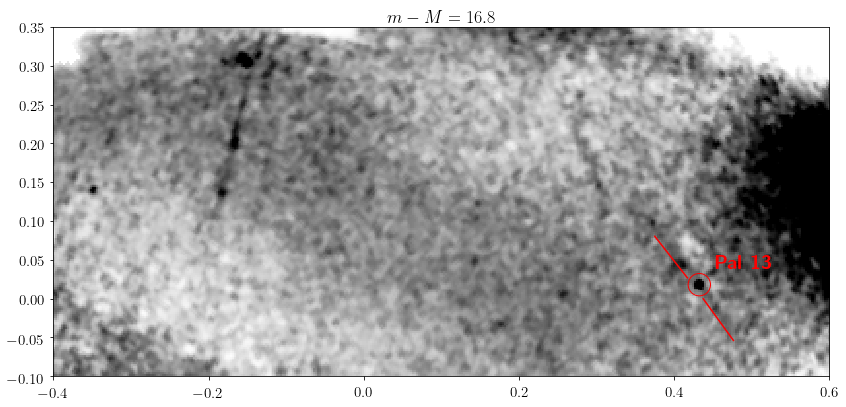

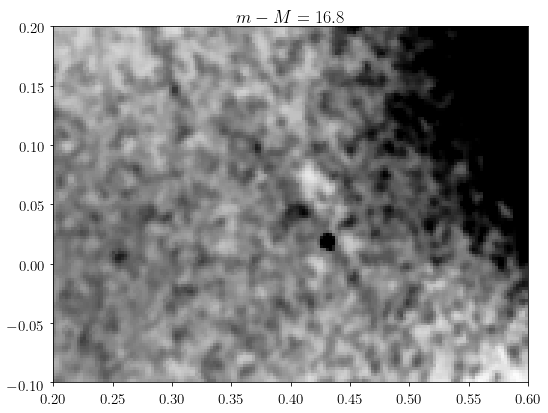

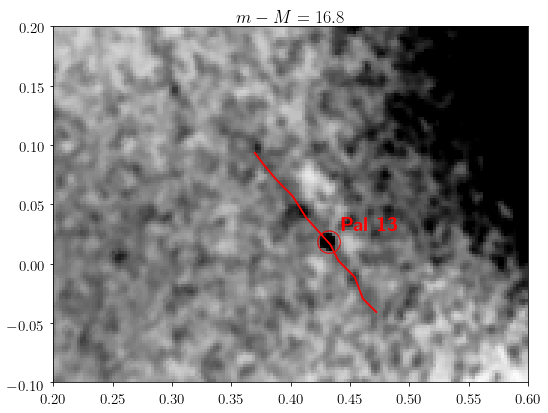

In [9]:
import plot_density_healpy
reload(plot_density_healpy)
import load_data
reload(load_data)
import streamlib
reload(streamlib)
import healpy as hp
from matplotlib.path import Path

proj1 = plot_density_healpy.get_ortho_proj(ends=[[8,13],[18,13]], half_sky=True)
mu = 16.8

hpxcube_south, fracdet_south, modulus = load_data.load_data('DECaLS', 0.001, 11., 23.0)
data_south = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, sgr=True, acs=False, globs_dwarfs=True)
data_south_unm = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, lmc=False, milky_way=False, sgr=False, globulars=False, dwarfs=False, galaxies=False, plane=False, center=False, globs_dwarfs=False, acs=False)
bkg1 = plot_density_healpy.fit_bkg(data_south, proj1, sigma=0.1)
bkg1.mask = data_south_unm.mask
    
ax1, im1 = plot_density_healpy.plot_proj(proj1, data_south_unm-bkg1, vmin=-1.5, vmax=1.5)
ax1.set_title(r'$m - M = %.1f$' %mu)
xmin, xmax, ymin, ymax = -0.4, 0.6, -0.1, 0.35
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)

ax1, im1 = plot_density_healpy.plot_proj(proj1, data_south_unm-bkg1, vmin=-1.5, vmax=1.5)
ax1.set_title(r'$m - M = %.1f$' %mu)
xmin, xmax, ymin, ymax = -0.4, 0.6, -0.1, 0.35
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)

x, y = proj1.ang2xy(ra_pal13, dec_pal13, lonlat=True)
ax1.scatter(x, y, s=500, marker='o', facecolors='none', edgecolors='r', zorder=100)
plt.annotate(r'$\mathrm{\textbf{Pal\ 13}}$', (x + 0.02, y + 0.02), color='r', fontsize=20)

x, y = proj1.ang2xy(ra_plot, dec_plot, lonlat=True)
print(x, y)
ax1.plot(x[:2], y[:2], c='r', zorder=100)
ax1.plot(x[2:], y[2:], c='r', zorder=100)


ax1, im1 = plot_density_healpy.plot_proj(proj1, data_south_unm-bkg1, vmin=-1.5, vmax=1.5)
ax1.set_title(r'$m - M = %.1f$' %mu)
xmin, xmax, ymin, ymax = 0.2, 0.6, -0.1, 0.2
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)

ax1, im1 = plot_density_healpy.plot_proj(proj1, data_south_unm-bkg1, vmin=-1.5, vmax=1.5)
ax1.set_title(r'$m - M = %.1f$' %mu)
xmin, xmax, ymin, ymax = 0.2, 0.6, -0.1, 0.2
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)

x, y = proj1.ang2xy(ra_pal13, dec_pal13, lonlat=True)
ax1.scatter(x, y, s=500, marker='o', facecolors='none', edgecolors='r', zorder=100)
plt.annotate(r'$\mathrm{\textbf{Pal\ 13}}$', (x + 0.01, y + 0.01), color='r', fontsize=20)

# x, y = proj1.ang2xy(ra_plot, dec_plot, lonlat=True)
# print(x, y)
# ax1.plot(x[:2], y[:2], c='r', zorder=100)
# ax1.plot(x[2:], y[2:], c='r', zorder=100)
x, y = proj1.ang2xy(ra_track, dec_track, lonlat=True)
ax1.plot(x, y, c='r', zorder=100)
ax1.plot(x, y, c='r', zorder=100)

# sel = (np.abs(phi1) < 5) & (np.abs(phi2) < 0.5)
# print(sel.sum())
# x, y = proj1.ang2xy(data['ra'][sel], data['dec'][sel], lonlat=True)
# ax1.scatter(x, y)


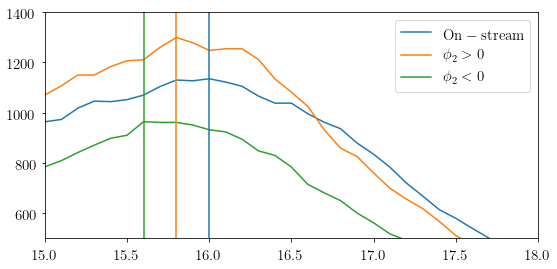

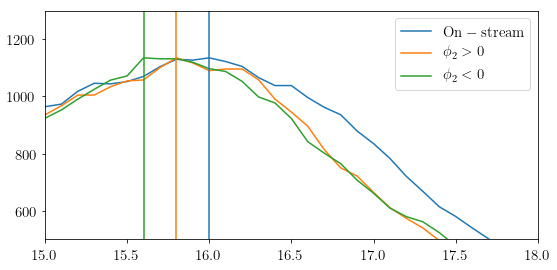

In [10]:
hpxmap = hpxcube_south[:,20]
ra, dec = hp.pix2ang(hp.npix2nside(len(hpxmap)), np.arange(len(hpxmap)), lonlat=True)
phi1, phi2 = rotation_matrix.phi12_rotmat(ra, dec, Rnew)

width_on = 0.5
width_off = 0.5
separation = 5.0

off_min = separation - width_off / 2.
off_max = separation + width_off / 2.

on_sel = (np.abs(phi1) < 5) & (np.abs(interp_track(phi1) - phi2) < (width_on/2.))
off_sel = (np.abs(phi1) < 5) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)

sep = angsep(ra, dec, ra_pal13, dec_pal13)
glob_sel = sep < 0.4
on_sel &= ~glob_sel

off_sel1 = off_sel & (phi2 < 0)
off_sel2 = off_sel & (phi2 > 0)

area_corr1 = on_sel.sum() / off_sel1.sum()
area_corr2 = on_sel.sum() / off_sel2.sum()
# print(area_corr1, area_corr2)

ons = []
offs1 = []
offs2 = []

for i, mu in enumerate(modulus):
    hpxmap = hpxcube_south[:,i]

    n_on = np.sum(hpxmap[on_sel])
    n_off1 = np.sum(hpxmap[off_sel1])*area_corr1
    n_off2 = np.sum(hpxmap[off_sel2])*area_corr2

    ons.append(n_on)
    offs1.append(n_off1)
    offs2.append(n_off2)
    
ons = np.asarray(ons)
offs1 = np.asarray(offs1)
offs2 = np.asarray(offs2)

norm1 = ons.max()/offs1.max()
norm2 = ons.max()/offs2.max()
    
plt.figure(figsize=(8,4))
plt.plot(modulus, ons, label=r'$\mathrm{On-stream}$')
plt.plot(modulus, offs1, label=r'$\phi_2 > 0$')
plt.plot(modulus, offs2, label=r'$\phi_2 < 0$')
plt.axvline(modulus[np.argmax(ons)], c='C0')
plt.axvline(modulus[np.argmax(offs1)], c='C1')
plt.axvline(modulus[np.argmax(offs2)], c='C2')
plt.legend()
plt.xlim(15,18)
plt.ylim(500,1400)

plt.figure(figsize=(8,4))
plt.plot(modulus, ons, label=r'$\mathrm{On-stream}$')
plt.plot(modulus, offs1*norm1, label=r'$\phi_2 > 0$')
plt.plot(modulus, offs2*norm2, label=r'$\phi_2 < 0$')
plt.axvline(modulus[np.argmax(ons)], c='C0')
plt.axvline(modulus[np.argmax(offs1)], c='C1')
plt.axvline(modulus[np.argmax(offs2)], c='C2')
plt.legend()
plt.xlim(15,18)
plt.ylim(500,1300)

plt.show()

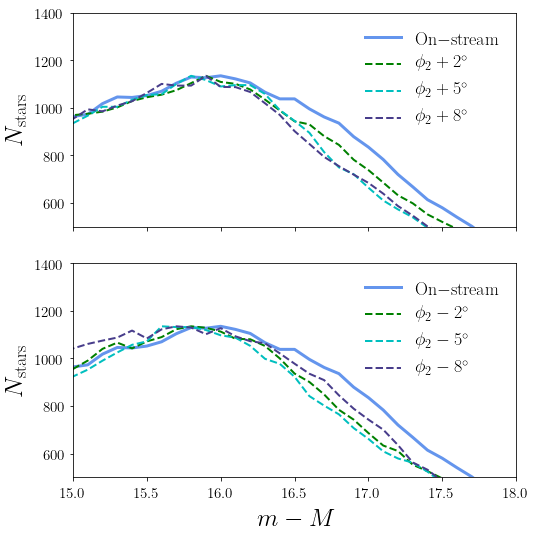

In [26]:
plot_density.plot_pretty(fontsize=25)

hpxmap = hpxcube_south[:,20]
ra, dec = hp.pix2ang(hp.npix2nside(len(hpxmap)), np.arange(len(hpxmap)), lonlat=True)
phi1, phi2 = rotation_matrix.phi12_rotmat(ra, dec, Rnew)

width_on = 0.5
width_off = 0.5

# separation = 5.0

colors = ['cornflowerblue', 'g', 'c', 'darkslateblue']


on_sel = (np.abs(phi1) < 5) & (np.abs(interp_track(phi1) - phi2) < (width_on/2.))
sep = angsep(ra, dec, ra_pal13, dec_pal13)
glob_sel = sep < 0.4
on_sel &= ~glob_sel

ons = []
for i, mu in enumerate(modulus):
    hpxmap = hpxcube_south[:,i]
    n_on = np.sum(hpxmap[on_sel])
    ons.append(n_on)

ons = np.asarray(ons)

#########################
# plt.figure(figsize=(12,6))

fig, ax = plt.subplots(2,1, figsize=(8,8), sharex=True)

ax[0].plot(modulus, ons, lw=3, c=colors[0], label=r'$\mathrm{On\mathrm{-}stream}$')
# ax[0].axvline(modulus[np.argmax(ons)], c='C0')

ax[0].set_xlim(15,18)
ax[0].set_ylim(500,1400)

ax[1].plot(modulus, ons, lw=3, c=colors[0], label=r'$\mathrm{On\mathrm{-}stream}$')
# ax[1].axvline(modulus[np.argmax(ons)], c='C0')

ax[1].set_xlim(15,18)
ax[1].set_ylim(500,1400)



for j, separation in enumerate([2.0, 5.0, 8.0]):
    off_min = separation - width_off / 2.
    off_max = separation + width_off / 2.

    off_sel = (np.abs(phi1) < 5) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)


    off_sel1 = off_sel & (phi2 < 0)
    off_sel2 = off_sel & (phi2 > 0)

    area_corr1 = on_sel.sum() / off_sel1.sum()
    area_corr2 = on_sel.sum() / off_sel2.sum()
    # print(area_corr1, area_corr2)

    offs1 = []
    offs2 = []

    for i, mu in enumerate(modulus):
        hpxmap = hpxcube_south[:,i]

        n_off1 = np.sum(hpxmap[off_sel1])*area_corr1
        n_off2 = np.sum(hpxmap[off_sel2])*area_corr2
        offs1.append(n_off1)
        offs2.append(n_off2)

    offs1 = np.asarray(offs1)
    offs2 = np.asarray(offs2)

    norm1 = ons.max()/offs1.max()
    norm2 = ons.max()/offs2.max()
#     norm1 = 1
#     norm2 = 1

    ax[0].plot(modulus, offs1*norm1, c=colors[j+1], ls='--', lw=2, label=r'$\phi_{\rm 2} + %i^{\circ}$' %separation)
    ax[1].plot(modulus, offs2*norm2, c=colors[j+1], ls='--', lw=2, label=r'$\phi_{\rm 2} - %i^{\circ}$' %separation)
#     ax[0].axvline(modulus[np.argmax(offs1)], c=colors[j+1], ls='--')
#     ax[1].axvline(modulus[np.argmax(offs2)], c=colors[j+1], ls='--')
    
#     plt.figure(figsize=(8,4))
#     plt.plot(modulus, ons, label=r'$\mathrm{On-stream}$')
#     plt.plot(modulus, offs1*norm1, label=r'$\phi_2 > 0$')
#     plt.plot(modulus, offs2*norm2, label=r'$\phi_2 < 0$')
#     plt.axvline(modulus[np.argmax(ons)], c='C0')
#     plt.axvline(modulus[np.argmax(offs1)], c='C1')
#     plt.axvline(modulus[np.argmax(offs2)], c='C2')
#     plt.legend()
#     plt.xlim(15,18)
#     plt.ylim(500,1300)


# plt.legend()
# ax[0].legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
# ax[1].legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].legend(frameon=False, loc='upper right', fontsize=18)
ax[1].legend(frameon=False, loc='upper right', fontsize=18)

ax[1].set_xlabel(r'$m - M$')
ax[0].set_ylabel(r'$N_{\rm stars}$')
ax[1].set_ylabel(r'$N_{\rm stars}$')

plt.savefig('../plots/Pal13/nstars_mod_norm.png')
plt.show()

In [59]:
dec[off_sel1].min(), dec[off_sel1].max(), dec[off_sel2].min(), dec[off_sel2].max() 

(11.262979546038238, 19.629556913945436, 5.679189845582371, 13.938804251170794)

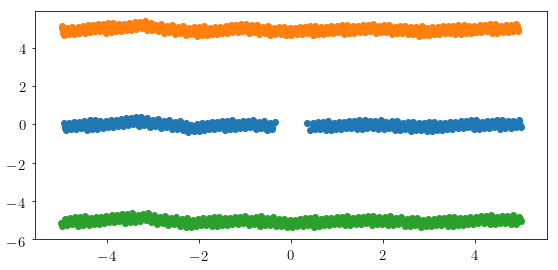

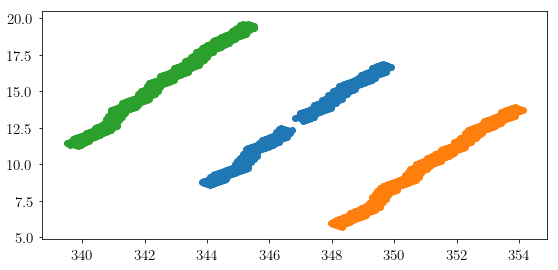

In [57]:
plt.figure(figsize=(8,4))
plt.scatter(phi1[on_sel], phi2[on_sel])
plt.scatter(phi1[off_sel1], phi2[off_sel1])
plt.scatter(phi1[off_sel2], phi2[off_sel2])

plt.figure(figsize=(8,4))
plt.scatter(ra[on_sel], dec[on_sel])
plt.scatter(ra[off_sel1], dec[off_sel1])
plt.scatter(ra[off_sel2], dec[off_sel2])

plt.show()

In [14]:
help(hp.pix2ang)

Help on function pix2ang in module healpy.pixelfunc:

pix2ang(nside, ipix, nest=False, lonlat=False)
    pix2ang : nside,ipix,nest=False,lonlat=False -> theta[rad],phi[rad] (default RING)
    
    Parameters
    ----------
    nside : int or array-like
      The healpix nside parameter, must be a power of 2, less than 2**30
    ipix : int or array-like
      Pixel indices
    nest : bool, optional
      if True, assume NESTED pixel ordering, otherwise, RING pixel ordering
    lonlat : bool, optional
      If True, return angles will be longitude and latitude in degree,
      otherwise, angles will be co-latitude and longitude in radians (default)
    
    Returns
    -------
    theta, phi : float, scalar or array-like
      The angular coordinates corresponding to ipix. Scalar if all input
      are scalar, array otherwise. Usual numpy broadcasting rules apply.
    
    See Also
    --------
    ang2pix, vec2pix, pix2vec
    
    Examples
    --------
    >>> import healpy as hp
    >

In [27]:
for mu in np.arange(15, 20.1, 0.1):
    data_south = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, sgr=True, acs=False, globs_dwarfs=True)
    data_south_unm = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, lmc=False, milky_way=False, sgr=False, globulars=False, dwarfs=False, galaxies=False, plane=False, center=False, globs_dwarfs=False, acs=False)
    bkg1 = plot_density_healpy.fit_bkg(data_south, proj1, sigma=0.1)
    bkg1.mask = data_south_unm.mask

    ax1, im1 = plot_density_healpy.plot_proj(proj1, data_south_unm-bkg1, vmin=-1.5, vmax=1.5)
    ax1.set_title(r'$m - M = %.1f$' %mu)
    xmin, xmax, ymin, ymax = -0.4, 0.6, -0.1, 0.35
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    plt.savefig('../plots/Pal13/mov7/%.1f.png' %mu)
    plt.close('all')

In [750]:
import elysian
import astropy.coordinates as coords
import astropy.units as u


hpxcube = hpxcube_south
fracdet = fracdet_south
stream='Pal 13'
ends=ends
mu=16.8
width=0.3
sigma=0.2
delta=0.2
vmin=-1.0
vmax=1.5
filename=None

for mu in np.arange(15, 19.05, 0.1):
# for mu in [16.8]:
    print(mu)
    filename = '../plots/Pal13/mov6/Pal13_%.1f.png' %mu

    length = angsep(ends[0][0], ends[0][1], ends[1][0], ends[1][1])

    data_south = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, sgr=True, acs=False, globs_dwarfs=True)
    data_south_unm = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, lmc=False, milky_way=False, sgr=False, globulars=False, dwarfs=False, galaxies=False, plane=False, center=False, globs_dwarfs=False, acs=False)
    bkg1 = plot_density_healpy.fit_bkg(data_south, proj1, sigma=0.1)
    bkg1.mask = data_south_unm.mask

    data = data_south_unm
    bkg = bkg1

    nside = hp.get_nside(data)

    height = max(1.2 * 6 * width, 5)
    length = max(1.2 * length, 1.5 * height)

    streampix = streamlib.get_streampix(data=data, stream=None, ends=ends)

    # delta = 0.1
    aspect = float(height) / length
    b = np.arange(-height, height, delta)
    l = np.arange(-length, length, delta)
    ll, bb = np.meshgrid((l[1:] + l[:-1]) / 2., (b[1:] + b[:-1]) / 2.)

    # phi, theta, psi = results.euler_angles(
    #     ends[0][0], ends[0][1], ends[1][0], ends[1][1])
    phi, theta, psi = 158.43563675417076, 122.99325234497584, 164.83377697716446

    reload(elysian)
    stream_cls = elysian.euler_factory(stream, phi, theta, psi, ends=ends)

    rot = stream_cls(Lambda=ll.flatten() * u.deg, Beta=bb.flatten() * u.deg)
    icrs = rot.transform_to(coords.ICRS)
    # coord_ends = coords.ICRS(*(stream_cls.ends.T * u.deg)).transform_to(stream_cls)
    # coord_ends.Lambda.wrap_angle = 180 * u.deg

    # Masking for hist
    pix = hp.ang2pix(nside, icrs.ra.deg, icrs.dec.deg, lonlat=True)
    value = (data - bkg)[pix].reshape(ll.shape)

    from ugali.utils import healpix
#     glob_pix = healpix.ang2disc(nside, ra_pal13, dec_pal13, 0.4)
#     # data[glob_pix] = np.ma.masked
#     data[glob_pix] = np.ma.nomask
#     # mask = (data.mask)[pix].reshape(ll.shape)

#     ra_blob, dec_blob = -11.935640649002254, 14.358352212823817
#     blob_pix = healpix.ang2disc(nside, ra_blob, dec_blob, 0.4)
#     # data[blob_pix] = np.ma.masked
#     data[blob_pix] = np.ma.nomask
    
    ra, dec = hp.pix2ang(nside, np.arange(len(data)), lonlat=True)
    mask_phi1, mask_phi2 = rotation_matrix.phi12_rotmat(ra, dec, R)
    data[np.abs(mask_phi1) > 5] = np.ma.nomask
    data[np.abs(mask_phi1) < 0.4] = np.ma.nomask
    
    mask = (data.mask)[pix].reshape(ll.shape)

    hist_value = (data - bkg)[pix].reshape(ll.shape)

    fig, ax = plt.subplots(1, 1, figsize=(5.0 / aspect, 5.0))
    ax.set_aspect('equal')
    divider = make_axes_locatable(ax)
    ax2 = divider.append_axes('right', size=1.2, pad=0.1, sharey=ax)
    cax = divider.append_axes('top', size='7%', pad=0.05)

    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax2.get_yticklabels(), visible=False)
    
    # Do the plotting...
    kw = dict(vmin=vmin, vmax=vmax, rasterized=True, cmap='gray_r')
    im = ax.pcolormesh(l, b, value, **kw)
    # im = ax.pcolormesh(l, b, value, **kw)

    plt.colorbar(im, cax, orientation='horizontal')
    cax.tick_params(axis='x', top=True, bottom=False,
                    labeltop=True, labelbottom=False)

    # ax.plot(ends.L.deg, ends.B.deg, ls='--', lw=1.5, color='deepskyblue')
    cts = hist_value.sum(axis=1)
    area = (~mask).sum(axis=1)
    ax2.plot(cts / area, (b[1:] + b[:-1]) / 2., color='k')

    label = r'${\rm \textbf{%s}}$' % stream.replace(' ', '\ ')
    # ax2.annotate(label, (0.95, 0.95), xycoords='axes fraction',
    #              fontsize=14, ha='right', va='top')
    # And the labeling
    ax.set_xlabel(r'$\phi_1\ {\rm (deg)}$')
    ax.set_ylabel(r'$\phi_2\ {\rm (deg)}$')
    ax.set_xlim(l.min(), l.max())
    ax.set_ylim(b.min(), b.max())
    # plt.suptitle(name)
    plt.subplots_adjust(bottom=0.05, top=0.98, right=0.98)

    if filename:
        plt.savefig(filename, bbox_inches='tight')
        plt.close('all')

15.0
-21.564363245829284 57.00674765502414 15.922480080272567


AttributeError: type object 'Pal 13' has no attribute 'flip'

16.8
Reading /Users/nora/projects/stream_search/data/DECaLS_iso_hpxcube_z0.0010_a11.0_gmax23.fits.gz...
Reading ../data/DECaLS_nside128.fits.gz...
-21.564363245829284 57.00674765502414 15.922480080272567


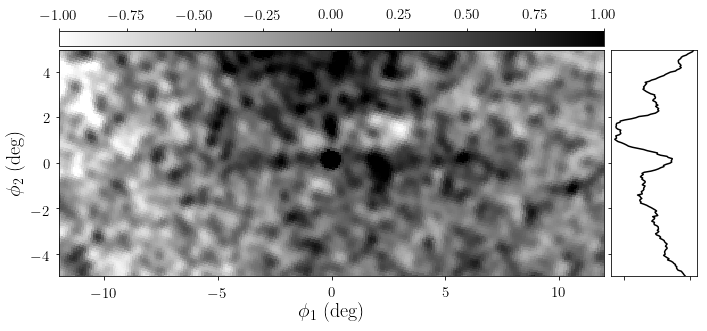

In [966]:
import elysian
import astropy.coordinates as coords
import astropy.units as u


hpxcube = hpxcube_south
fracdet = fracdet_south
stream='Pal 13'
ends=ends
mu=16.8
width=0.3
sigma=0.2
delta=0.2
vmin=-1.0
vmax=1.0 # 1.5
filename=None

# for mu in np.arange(15, 19.05, 0.1):
for mu in [16.8]:
    print(mu)
    filename = '../plots/Pal13/Paper/Pal13_zoom.png'

    length = angsep(ends[0][0], ends[0][1], ends[1][0], ends[1][1])

    hpxcube_south, fracdet_south, modulus = load_data.load_data('DECaLS', 0.001, 11., 23.0)
    data_south = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, sgr=True, acs=False, globs_dwarfs=True)
    data_south_unm = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, lmc=False, milky_way=False, sgr=False, globulars=False, dwarfs=False, galaxies=False, plane=False, center=False, globs_dwarfs=False, acs=False)
    bkg1 = plot_density_healpy.fit_bkg(data_south, proj1, sigma=0.1)
    bkg1.mask = data_south_unm.mask

    data = np.ma.copy(data_south_unm)
    bkg = np.ma.copy(bkg1)

    nside = hp.get_nside(data)

    height = max(1.2 * 6 * width, 5)
    length = max(1.2 * length, 1.5 * height)

    streampix = streamlib.get_streampix(data=data, stream=None, ends=ends)

    delta = 0.05
    aspect = float(height) / length
    b = np.arange(-height, height, delta)
    l = np.arange(-length, length, delta)
    ll, bb = np.meshgrid((l[1:] + l[:-1]) / 2., (b[1:] + b[:-1]) / 2.)

    # phi, theta, psi = results.euler_angles(
    #     ends[0][0], ends[0][1], ends[1][0], ends[1][1])
    phi, theta, psi = 158.43563675417076, 122.99325234497584, 164.83377697716446
#     phi, theta, psi = -21.564363245829284, 57.00674765502414, 15.166223022835581
    
    reload(elysian)
    stream_cls = elysian.euler_factory(stream, phi, theta, psi, ends=ends, flip=True)

    rot = stream_cls(Lambda=ll.flatten() * u.deg, Beta=bb.flatten() * u.deg)
    icrs = rot.transform_to(coords.ICRS)
    # coord_ends = coords.ICRS(*(stream_cls.ends.T * u.deg)).transform_to(stream_cls)
    # coord_ends.Lambda.wrap_angle = 180 * u.deg

    # Masking for hist
    pix = hp.ang2pix(nside, icrs.ra.deg, icrs.dec.deg, lonlat=True)
    value = (data - bkg)[pix].reshape(ll.shape)

    from ugali.utils import healpix
#     glob_pix = healpix.ang2disc(nside, ra_pal13, dec_pal13, 0.4)
#     # data[glob_pix] = np.ma.masked
#     data[glob_pix] = np.ma.nomask
#     # mask = (data.mask)[pix].reshape(ll.shape)

#     ra_blob, dec_blob = -11.935640649002254, 14.358352212823817
#     blob_pix = healpix.ang2disc(nside, ra_blob, dec_blob, 0.4)
#     # data[blob_pix] = np.ma.masked
#     data[blob_pix] = np.ma.nomask
    
#     mask_pix = healpix.ang2disc(nside, ra_pal13, dec_pal13-2, 0.4)
#     data[mask_pix]  = np.ma.nomask
#     value = (data - bkg)[pix].reshape(ll.shape)

    ra, dec = hp.pix2ang(nside, np.arange(len(data)), lonlat=True)
    mask_phi1, mask_phi2 = rotation_matrix.phi12_rotmat(ra, dec, R)
    data[np.abs(mask_phi1) > 5] = np.ma.nomask
    data[np.abs(mask_phi1) < 0.4] = np.ma.nomask
    data[(mask_phi1 > -2.5) & (mask_phi1 < -1.5)] = np.ma.nomask
#     value = (data - bkg)[pix].reshape(ll.shape)

    
    mask = (data.mask)[pix].reshape(ll.shape)

    hist_value = (data - bkg)[pix].reshape(ll.shape)

    fig, ax = plt.subplots(1, 1, figsize=(5.0 / aspect, 5.0))
    ax.set_aspect('equal')
    divider = make_axes_locatable(ax)
    ax2 = divider.append_axes('right', size=1.2, pad=0.1, sharey=ax)
    cax = divider.append_axes('top', size='7%', pad=0.05)

    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax2.get_yticklabels(), visible=False)
    
    # Do the plotting...
    kw = dict(vmin=vmin, vmax=vmax, rasterized=True, cmap='gray_r')
    im = ax.pcolormesh(l, b, value, **kw)
    # im = ax.pcolormesh(l, b, value, **kw)

    plt.colorbar(im, cax, orientation='horizontal')
    cax.tick_params(axis='x', top=True, bottom=False,
                    labeltop=True, labelbottom=False)

    # ax.plot(ends.L.deg, ends.B.deg, ls='--', lw=1.5, color='deepskyblue')
    cts = hist_value.sum(axis=1)
    area = (~mask).sum(axis=1)
    ax2.plot(cts / area, (b[1:] + b[:-1]) / 2., color='k')

    label = r'${\rm \textbf{%s}}$' % stream.replace(' ', '\ ')
    # ax2.annotate(label, (0.95, 0.95), xycoords='axes fraction',
    #              fontsize=14, ha='right', va='top')
    # And the labeling
    ax.set_xlabel(r'$\phi_1\ {\rm (deg)}$')
    ax.set_ylabel(r'$\phi_2\ {\rm (deg)}$')
    ax.set_xlim(l.min(), l.max())
    ax.set_ylim(b.min(), b.max())
    # plt.suptitle(name)
    plt.subplots_adjust(bottom=0.05, top=0.98, right=0.98)

    if filename:
        plt.savefig(filename, bbox_inches='tight')
#         plt.close('all')

In [965]:
ends

[[-9.804650620987337, 17.42797474620764],
 [-15.565158278830129, 9.145015179988334]]

In [327]:
reload(plot_density_healpy)
from mpl_toolkits.axes_grid1 import make_axes_locatable

mu = 16.8
age = 13.5
z = 0.001

proj2 = plot_density_healpy.get_gnomonic_proj(ends=ends, reso=1.0)

for mu in np.arange(15, 19.05, 0.1):
    print(mu)

#     data_south = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, sgr=True, acs=False, globs_dwarfs=True)
#     data_south_unm = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, lmc=False, milky_way=False, sgr=False, globulars=False, dwarfs=False, galaxies=False, plane=False, center=False, globs_dwarfs=False, acs=False)
#     bkg1 = plot_density_healpy.fit_bkg(data_south, proj1, sigma=0.1)
#     bkg1.mask = data_south_unm.mask

    xmin, xmax, ymin, ymax = -0.14, 0.14, -0.05, 0.05
    aspect = (ymax-ymin)/(xmax-xmin)
    fig, ax = plt.subplots(1, 1, figsize=(5.0 / aspect, 5.0))
    ax.set_aspect('equal')
    divider = make_axes_locatable(ax)

    # ax2 = divider.append_axes('right', size=1.2, pad=0.1, sharey=ax)
    # sel = (np.abs(phi1 < 5))
    # iso_sel_mu = filter_data.select_isochrone(data['MAG_SFD_G'], data['MAG_SFD_R'], err, iso_params=[mu, age, z], dmu=0.5, C=[0.025, 0.05], E=2, gmin=20.0, survey='DECaLS')
    # ax2.hist(phi2[sel&~glob_sel&iso_sel_mu])
    # plt.setp(ax2.get_yticklabels(), visible=False)

    ax1 = plot_density_healpy.plot_proj(proj2, data_south_unm-bkg1, ax=ax, vmin=-1., vmax=1.25)
    ax1.set_title(r'$m - M = %.1f$' %mu)

    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    
    plt.savefig('../plots/Pal13/mov5/Pal13_%.1f.png' %mu)
    plt.close('all')


Using ends =  [[-15.565158278830129, 9.145015179988334], [-9.804650620987337, 17.42797474620764]]
347.2658055846211 13.302698711724346 55.968419445527175
15.0
15.1
15.2
15.299999999999999
15.399999999999999
15.499999999999998
15.599999999999998
15.699999999999998
15.799999999999997
15.899999999999997
15.999999999999996
16.099999999999994
16.199999999999996
16.299999999999997
16.399999999999995
16.499999999999993
16.599999999999994
16.699999999999996
16.799999999999994
16.89999999999999
16.999999999999993
17.099999999999994
17.199999999999992
17.29999999999999
17.39999999999999
17.499999999999993
17.59999999999999
17.69999999999999
17.79999999999999
17.89999999999999
17.99999999999999
18.099999999999987
18.19999999999999
18.29999999999999
18.399999999999988
18.499999999999986
18.599999999999987
18.69999999999999
18.799999999999986
18.899999999999984
18.999999999999986


In [298]:
import plot_density_healpy
reload(plot_density_healpy)
import load_data
reload(load_data)
import streamlib
reload(streamlib)
import healpy as hp
from matplotlib.path import Path

proj1 = plot_density_healpy.get_ortho_proj(ends=[[8,13],[18,13]], half_sky=True)
# mu = 16.8
for mu in np.arange(15, 19+0.05, 0.1):
    # hpxcube_south, fracdet_south, modulus = load_data.load_data('DECaLS', 0.0001, 13.5, 23.0)
    data_south = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, sgr=True, acs=False, globs_dwarfs=True)
    data_south_unm = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, lmc=False, milky_way=False, sgr=False, globulars=False, dwarfs=False, galaxies=False, plane=False, center=False, globs_dwarfs=False, acs=False)
    bkg1 = plot_density_healpy.fit_bkg(data_south, proj1, sigma=0.1)
    bkg1.mask = data_south_unm.mask

    ax1 = plot_density_healpy.plot_proj(proj1, data_south_unm-bkg1, vmin=-1.5, vmax=1.5)
    ax1.set_title(r'$m - M = %.1f$' %mu)
    xmin, xmax, ymin, ymax = -0.4, 0.6, -0.1, 0.35
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    plt.savefig('../plots/Pal13/mov1/Pal13_%.1f.png' %mu)
    plt.close('all')

    
    ax1 = plot_density_healpy.plot_proj(proj1, data_south_unm-bkg1, vmin=-1.5, vmax=1.5)
    ax1.set_title(r'$m - M = %.1f$' %mu)
    xmin, xmax, ymin, ymax = -0.4, 0.6, -0.1, 0.35
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)

    x, y = proj1.ang2xy(ra_pal13, dec_pal13, lonlat=True)
    ax1.scatter(x, y, s=500, marker='o', facecolors='none', edgecolors='r', zorder=100)
    plt.annotate(r'$\mathrm{\textbf{Pal\ 13}}$', (x + 0.02, y + 0.02), color='r', fontsize=20)

    x, y = proj1.ang2xy(ra_plot, dec_plot, lonlat=True)
#     print(x, y)
    ax1.plot(x[:2], y[:2], c='r', zorder=100)
    ax1.plot(x[2:], y[2:], c='r', zorder=100)
    plt.savefig('../plots/Pal13/mov2/Pal13_%.1f.png' %mu)
    plt.close('all')


    ax1 = plot_density_healpy.plot_proj(proj1, data_south_unm-bkg1, vmin=-1.5, vmax=1.5)
    ax1.set_title(r'$m - M = %.1f$' %mu)
    xmin, xmax, ymin, ymax = 0.2, 0.6, -0.1, 0.2
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    plt.savefig('../plots/Pal13/mov3/Pal13_%.1f.png' %mu)
    plt.close('all')

    
    ax1 = plot_density_healpy.plot_proj(proj1, data_south_unm-bkg1, vmin=-1.5, vmax=1.5)
    ax1.set_title(r'$m - M = %.1f$' %mu)
    xmin, xmax, ymin, ymax = 0.2, 0.6, -0.1, 0.2
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)

    x, y = proj1.ang2xy(ra_pal13, dec_pal13, lonlat=True)
    ax1.scatter(x, y, s=500, marker='o', facecolors='none', edgecolors='r', zorder=100)
    plt.annotate(r'$\mathrm{\textbf{Pal\ 13}}$', (x + 0.01, y + 0.01), color='r', fontsize=20)

    x, y = proj1.ang2xy(ra_plot, dec_plot, lonlat=True)
#     print(x, y)
    ax1.plot(x[:2], y[:2], c='r', zorder=100)
    ax1.plot(x[2:], y[2:], c='r', zorder=100)
    plt.savefig('../plots/Pal13/mov4/Pal13_%.1f.png' %mu)
    plt.close('all')

    
    # sel = (np.abs(phi1) < 5) & (np.abs(phi2) < 0.5)
    # print(sel.sum())
    # x, y = proj1.ang2xy(data['ra'][sel], data['dec'][sel], lonlat=True)
    # ax1.scatter(x, y)


13.0 13.047961797466591 0.0058025908791567785
[0.3749352  0.41702564 0.43731591 0.47626296] [ 0.08037379  0.02676968 -0.00010273 -0.0538246 ]
[0.3749352  0.41702564 0.43731591 0.47626296] [ 0.08037379  0.02676968 -0.00010273 -0.0538246 ]
[0.3749352  0.41702564 0.43731591 0.47626296] [ 0.08037379  0.02676968 -0.00010273 -0.0538246 ]
[0.3749352  0.41702564 0.43731591 0.47626296] [ 0.08037379  0.02676968 -0.00010273 -0.0538246 ]
[0.3749352  0.41702564 0.43731591 0.47626296] [ 0.08037379  0.02676968 -0.00010273 -0.0538246 ]
[0.3749352  0.41702564 0.43731591 0.47626296] [ 0.08037379  0.02676968 -0.00010273 -0.0538246 ]
[0.3749352  0.41702564 0.43731591 0.47626296] [ 0.08037379  0.02676968 -0.00010273 -0.0538246 ]
[0.3749352  0.41702564 0.43731591 0.47626296] [ 0.08037379  0.02676968 -0.00010273 -0.0538246 ]
[0.3749352  0.41702564 0.43731591 0.47626296] [ 0.08037379  0.02676968 -0.00010273 -0.0538246 ]
[0.3749352  0.41702564 0.43731591 0.47626296] [ 0.08037379  0.02676968 -0.00010273 -0.0538

In [11]:
# ra_pal13, dec_pal13 = 346.685, 12.772
# r_pal13 = 6.7/60. # jacobi radius from Bradford+2013 https://arxiv.org/pdf/1110.0484.pdf
# print(r_pal13)

In [12]:
# track = [[-15.565158278830129, 9.145015179988334], [-14.881249805204186, 9.873014086896049], [-14.53725784224214, 10.956851911047934], [-13.731111722451066, 11.824486548597307], [-13.373216530635766, 12.645598497803462], [-12.198346421088706, 14.068007512069045], [-11.590156400814827, 15.172339805750198], [-10.808168892877427, 16.02910634268146], [-10.175911928488054, 16.87124879970905], [-9.804650620987337, 17.42797474620764]]
# ra_track, dec_track = [[ i for i, j in track ], 
#                        [ j for i, j in track ]]

In [13]:
# other_track = [[-6.413138094709281, 18.481718578537567], [-5.654385929612482, 20.641511309077416], [-5.146744255492336, 22.39515838142583], [-4.295265918941964, 24.8457519258353], [-3.731897475747959, 27.162778597326636]]
# # other_track = [[-5.995102922833517, 18.64427628229295], [-5.670529800524326, 20.773798578119496], [-4.905343241227553, 22.810361925533385], [-4.573124339033452, 24.695900155051717], [-4.362689904189643, 26.31733373101555], [-4.012919484882698, 27.01214512340791]]
# ra_other_track, dec_other_track = [[ i for i, j in other_track ], 
#                                    [ j for i, j in other_track ]]
# print(ra_other_track, dec_other_track)

# res = np.polyfit(ra_other_track, dec_other_track, deg=2)

In [14]:
# plt.figure(figsize=(8,3))
# plt.scatter(ra_other_track, dec_other_track)
# xx = np.arange(-6.5, -3.5, 0.1)
# plt.plot(xx, res[0]*xx**2+res[1]*xx+res[2])
# print(res)

# # 0.176 ra**2 + 4.979 ra + 43.196

In [15]:
# np.set_printoptions(precision=3)
# print(repr(np.asarray(track)))

In [16]:
# reload(streamlib)
# import results
# reload(results)

# ends = [[ra_track[0], dec_track[0]],[ra_track[-1], dec_track[-1]]]
# R = np.array(streamlib.get_rotmat(ends=ends, center=(ra_pal13, dec_pal13)))

# ends = [[ra_track[-1], dec_track[-1]],[ra_track[0], dec_track[0]]]
# R1 = np.array(streamlib.get_rotmat(ends=ends, center=(ra_pal13, dec_pal13)))
# print(R)
# print(R1)

# # Rnew = [[ 0.95,  -0.222,  0.219],
# #         [ 0.05,  -0.585, -0.81 ],
# #         [-0.308, -0.78,   0.545]]

# Rnew = np.copy(R)
# Rnew[-2] *= -1
# print(Rnew)

In [17]:
# lon1, lat1, lon2, lat2 = ra_track[0], dec_track[0], ra_track[-1], dec_track[-1]
# center = (ra_pal13, dec_pal13)

# pole = results.find_pole(lon1, lat1, lon2, lat2)

# # Initial rotation
# phi = pole[0] - 90.
# theta = pole[1] + 90.
# psi = 0.

# matrix = results.create_matrix(phi, theta, psi)

# print(matrix)

# lon = np.radians([center[0]])
# lat = np.radians([center[1]])

# X = np.cos(lat) * np.cos(lon)
# Y = np.cos(lat) * np.sin(lon)
# Z = np.sin(lat)

# # Calculate X,Y,Z,distance in the stream system
# Xs, Ys, Zs = matrix.dot(np.array([X, Y, Z]))
# Zs = -Zs
# # print('no z flip')

# phi1, phi2 = rotation_matrix.phi12_rotmat(lon, lat, matrix)
# print(np.radians(phi1), np.radians(phi2))
# print(Xs, Ys, Zs)
# print()

# # Calculate the transformed longitude
# Lambda = np.arctan2(Ys, Xs)
# Lambda[Lambda < 0] = Lambda[Lambda < 0] + 2. * np.pi
# psi = float(np.mean(np.degrees(Lambda)))

# matrix = results.create_matrix(phi, theta, psi)
# print(matrix)

# print()
# test(matrix)


In [18]:
def test(R):
    arr = np.ones(1)
    R = np.copy(R)
#     R[-2] *= -1
    
#     R[-1] *= -1
    
    phi1, phi2 = rotation_matrix.phi12_rotmat(ra_pal13*arr, dec_pal13*arr, R)
    print('%.2f, %.2f' %(phi1[0], phi2[0]))

#     print()
    
#     phi1, phi2 = rotation_matrix.phi12_rotmat(ra_pal13*arr, dec_pal13*arr+2, R)
#     print('%.2f, %.2f' %(phi1[0], phi2[0]))
    
#     phi1, phi2 = rotation_matrix.phi12_rotmat(ra_pal13*arr, dec_pal13*arr-2, R)
#     print('%.2f, %.2f' %(phi1[0], phi2[0]))

#     print()
    
    phi1, phi2 = rotation_matrix.phi12_rotmat(ra_pal13*arr+2, dec_pal13*arr, R)
    print('%.2f, %.2f' %(phi1[0], phi2[0]))
    
#     phi1, phi2 = rotation_matrix.phi12_rotmat(ra_pal13*arr-1, dec_pal13*arr, R)
#     print('%.2f, %.2f' %(phi1[0], phi2[0]))
    
#     print(R)
    print()

    
# test(R)
# test(R1)
# test(Rnew)

In [19]:
# phi1_test, phi2_test = rotation_matrix.phi12_rotmat(np.asarray(ra_track),  np.asarray(dec_track), Rnew)

# plt.figure(figsize=(10,3))
# plt.scatter(phi1_test, phi2_test)

# phi1_test, phi2_test = rotation_matrix.phi12_rotmat(np.asarray(ra_track),  np.asarray(dec_track), R)
# plt.scatter(phi1_test, phi2_test)

# phi1_pal13, phi2_pal13 = rotation_matrix.phi12_rotmat(np.array([ra_pal13]),  np.array([dec_pal13]), Rnew)
# plt.plot(phi1_pal13, phi2_pal13, '*r', ms=20, alpha=0.1)
# print(phi1_pal13, phi2_pal13)

# phi1_pal13, phi2_pal13 = rotation_matrix.phi12_rotmat(np.array([ra_pal13]),  np.array([dec_pal13]), R)
# plt.plot(phi1_pal13,  phi2_pal13, '*b', ms=20, alpha=0.2)
# print(phi1_pal13, phi2_pal13)

# plt.show()

In [20]:
# ends

In [277]:
# phi1_track, phi2_track = rotation_matrix.phi12_rotmat(np.asarray(ra_track), np.asarray(dec_track), R)

# interp_track = interp1d(phi1_track, phi2_track, fill_value='extrapolate')

In [286]:
# ra_plot, dec_plot = rotation_matrix.phi12_rotmat(np.array([-5, -1, 1, 5]), np.array([0.25]*4), np.linalg.inv(R))

In [21]:
# length = angsep(ends[0][0], ends[0][1], ends[1][0], ends[1][1])
# print('length = %.2f deg' %length)

In [411]:
data = fitsio.open('../data/cutouts/Pal13.fits.gz')[1].data

In [412]:
phi1, phi2 = rotation_matrix.phi12_rotmat(data['ra'], data['dec'], R)

In [569]:
sep = angsep(data['ra'], data['dec'], ra_pal13, dec_pal13)
glob_sel = sep < 0.4 # r_pal13 # 0.4 # < 0.1

ra_off, dec_off = ra_pal13 - 2.0, dec_pal13 - 2.0
sep = angsep(data['ra'], data['dec'], ra_off, dec_off)
glob_sel_off = sep < 0.4 # r_pal13 # 0.4 # < 0.1

In [446]:
plot_density.dist2mod(26)

17.07486673985409

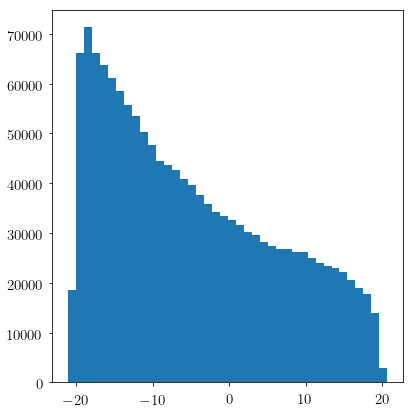

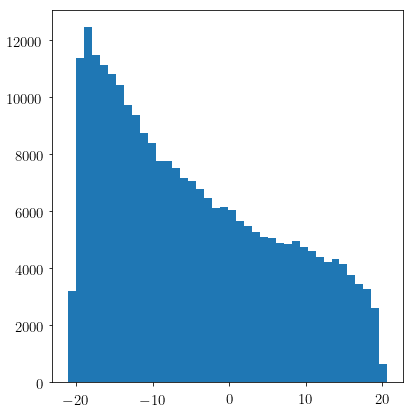

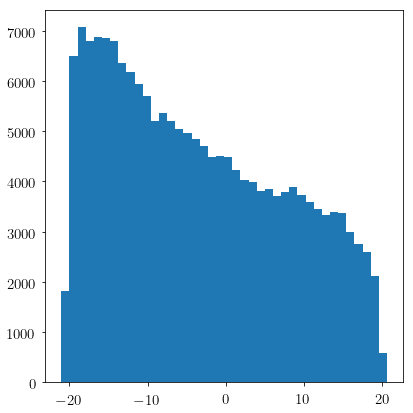

In [447]:
sel = np.abs(phi1) < 5

plt.figure(figsize=(6,6))
plt.hist(phi2[sel&~glob_sel], bins=40)

plt.figure(figsize=(6,6))
plt.hist(phi2[sel&~glob_sel&iso_sel], bins=40)

plt.figure(figsize=(6,6))
plt.hist(phi2[sel&~glob_sel&iso_sel2], bins=40)

plt.show()

In [573]:
iso.z2feh(0.0001)

-2.17317404715828

In [577]:
plot_density.mod2dist(np.array([15, 19]))

array([10.   , 63.096])

-5.0 0.0
0.0 5.0


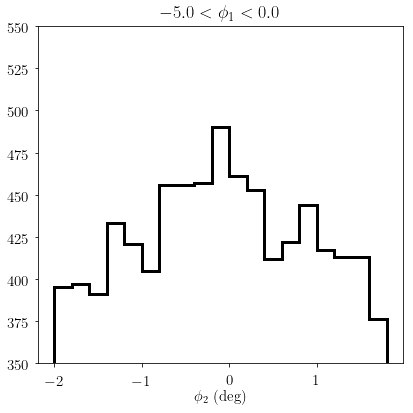

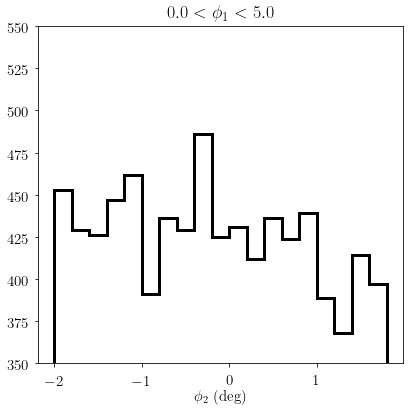

In [572]:
dx = 5.0
bins = np.arange(-2, 2, 0.2)
for x in np.arange(-5, 5-dx/2, dx):
    print(x, x+dx)
    sel = (phi1 > x) & (phi1 < x + dx)

#     plt.figure(figsize=(6,6))
#     plt.hist(phi2[sel&~glob_sel&iso_sel], bins=40)

    plt.figure(figsize=(6,6))
    plt.hist(phi2[sel&~glob_sel&iso_sel2], bins=bins, histtype='step', color='k', lw=3)
    
    from scipy.stats import norm
    plt.plot()
    
    
    plt.title(r'$%.1f < \phi_1 < %.1f$' %(x, x+dx))
    plt.ylim(350, 550)
#     plt.ylim(200, 450)
    plt.xlabel(r'$\mathrm{\phi_2}\ \mathrm{(deg)}$')

plt.show()

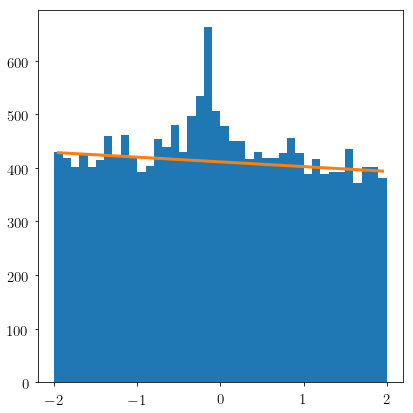

In [449]:
sel = np.abs(phi1) < 5
counts, bins = np.histogram(phi2[sel&iso_sel2], bins=np.arange(-2, 2+0.01/2, 0.1))
bin_centers = np.mean([bins[1:], bins[:-1]], axis=0)

cut = np.abs(bin_centers) > 1
res = np.polyfit(bin_centers[cut], counts[cut], deg=1)

plt.figure(figsize=(6,6))
plt.hist(phi2[sel&iso_sel2], bins=bins, normed=False)
plt.plot(bin_centers, bin_centers*res[0] + res[1], lw=3)
plt.show()

In [450]:
import filter_data
reload(filter_data)
import surveys
reload(surveys)
err = surveys.surveys['DECaLS']['err']
mu, age, z = 16.8, 12.0, 0.001
iso = filter_data.isochrone_factory('Dotter', survey='DES', age=age, distance_modulus=mu, z=z)
# z = iso.feh2z(-1.6)
# iso = filter_data.isochrone_factory('Dotter', survey='DES', age=age, distance_modulus=mu, z=z)
mk = filter_data.mkpol(mu=mu, age=age, z=z, dmu=0.5, C=[0.025, 0.05], E=2., err=err, survey='DECaLS')

# iso_sel = filter_data.select_isochrone(data['MAG_SFD_G'], data['MAG_SFD_R'], err, iso_params=[mu, age, z], dmu=0.5, C=[0.025, 0.05], E=2, gmin=None, survey='DECaLS')
iso_sel2 = filter_data.select_isochrone(data['MAG_SFD_G'], data['MAG_SFD_R'], err, iso_params=[mu, age, z], dmu=0.5, C=[0.025, 0.05], E=2, gmin=20.0, survey='DECaLS')

In [687]:
iso.feh2z(-2)

0.00014897150959342325

dx, dy =  0.02 0.0833
dx, dy =  0.02 0.0833
dx, dy =  0.02 0.0833


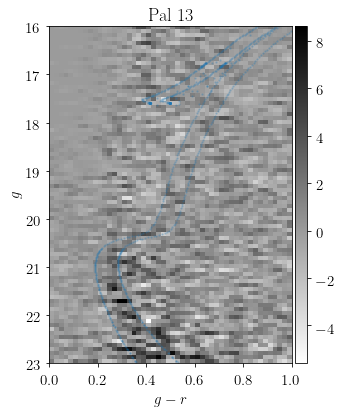

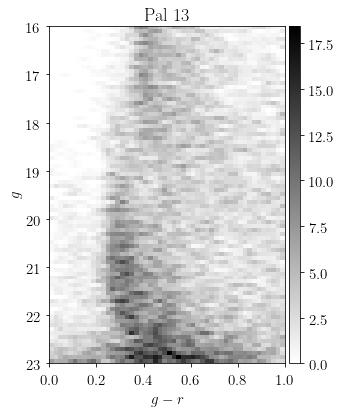

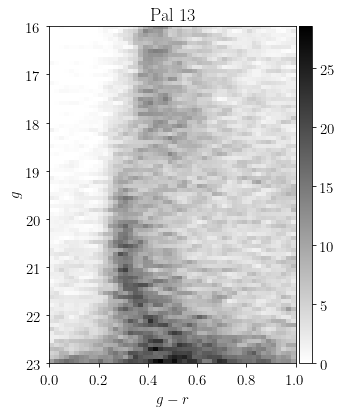

In [433]:
import plot_hess
reload(plot_hess)

mu = 16.8

sels_on = []
sels_off = []

dx = 10
width_on = 0.5
width_off = 0.5
separation = 2.0
off_min = separation - width_off / 2.
off_max = separation + width_off / 2.

# for x in np.arange(-5.0, 5.0, dx):
for x in [-5]:
    sel_on = (phi1 > x) & (phi1 < x + dx) & (np.abs(interp_track(phi1) - phi2) < width_on/2.)
    sel_off = (phi1 > x) & (phi1 < x + dx) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)
    if sel_on.sum() == 0 or sel_off.sum() == 0:
        continue

    sels_on.append(sel_on)
    sels_off.append(sel_off)
    ax, im = plot_hess.plot_hess( 'Pal\ 13', data[sel_on], data[sel_off], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04/2., dy=0.1666/2., no_bkg=False, smoothing=(.75, .25))
    plt.sca(ax)
    plt.scatter(mk[:,0], mk[:,1]+mu, s=2, alpha=0.2)
    # plt.scatter(iso.color, iso.mag+iso.distance_modulus, s=2, alpha=0.5)
    plt.xlim(0,1)
    plt.ylim(23., 16)
    
    plot_hess.plot_hess( 'Pal\ 13', data[sel_on], data[sel_off], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04/2., dy=0.1666/2., no_bkg=True, smoothing=(.75, .25))
    plot_hess.plot_hess( 'Pal\ 13', data[sel_off], data[sel_on], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04/2., dy=0.1666/2., no_bkg=True, smoothing=(.75, .25))

plt.show()

dx, dy =  0.02 0.0833
dx, dy =  0.02 0.0833
dx, dy =  0.02 0.0833


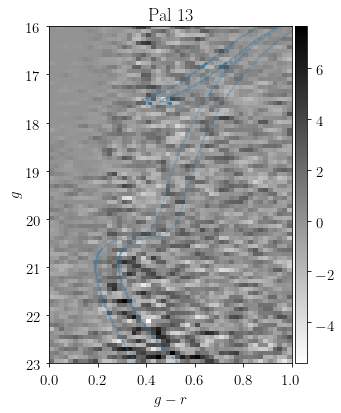

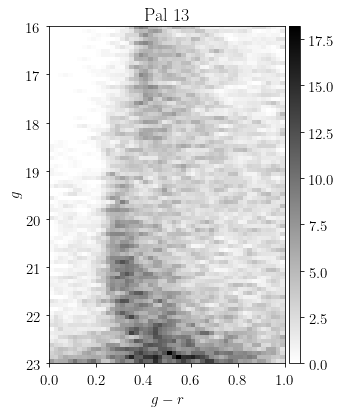

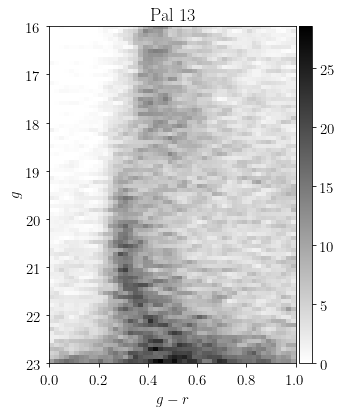

In [434]:
import plot_hess
reload(plot_hess)

sels_on = []
sels_off = []

mu=16.8

dx = 10
width_on = 0.5
width_off = 0.5
separation = 2.0
off_min = separation - width_off / 2.
off_max = separation + width_off / 2.

# for x in np.arange(-5.0, 5.0, dx):
for x in [-5]:
    sel_on = (phi1 > x) & (phi1 < x + dx) & (np.abs(interp_track(phi1) - phi2) < width_on/2.)
    sel_off = (phi1 > x) & (phi1 < x + dx) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)
    if sel_on.sum() == 0 or sel_off.sum() == 0:
        continue

    sels_on.append(sel_on)
    sels_off.append(sel_off)
    ax, im = plot_hess.plot_hess( 'Pal\ 13', data[sel_on&~glob_sel], data[sel_off&~glob_sel], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04/2., dy=0.1666/2., no_bkg=False, smoothing=(.75, .25))
    plt.sca(ax)
    plt.scatter(mk[:,0], mk[:,1]+mu, s=2, alpha=0.2)
    # plt.scatter(iso.color, iso.mag+iso.distance_modulus, s=2, alpha=0.5)
    plt.xlim(0,1)
    plt.ylim(23., 16)
    
    plot_hess.plot_hess( 'Pal\ 13', data[sel_on&~glob_sel], data[sel_off&~glob_sel], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04/2., dy=0.1666/2., no_bkg=True, smoothing=(.75, .25))
    plot_hess.plot_hess( 'Pal\ 13', data[sel_off&~glob_sel], data[sel_on&~glob_sel], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04/2., dy=0.1666/2., no_bkg=True, smoothing=(.75, .25))

plt.show()

dx, dy =  0.02 0.0833
dx, dy =  0.02 0.0833
dx, dy =  0.02 0.0833


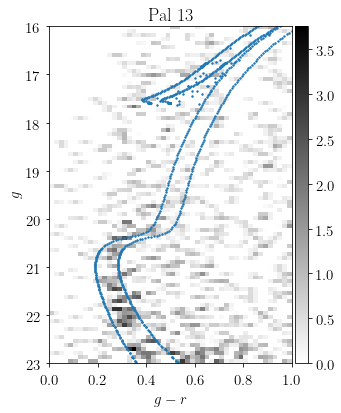

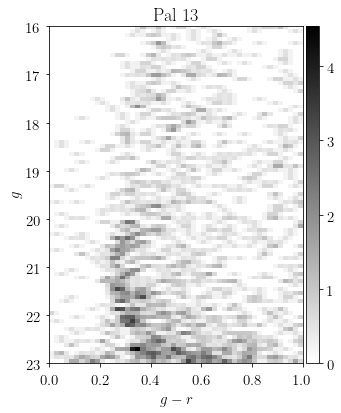

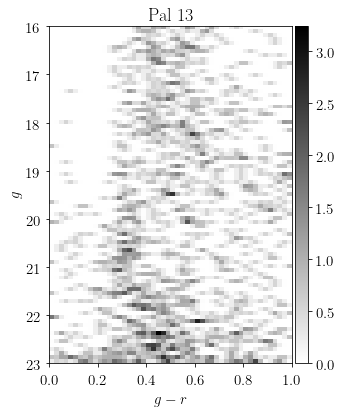

In [453]:
import plot_hess
reload(plot_hess)

sels_on = []
sels_off = []

mu=16.8

dx = 10
width_on = 0.5
width_off = 0.5
separation = 2.0
off_min = separation - width_off / 2.
off_max = separation + width_off / 2.

# for x in np.arange(-5.0, 5.0, dx):
for x in [-5]:
    sel_on = (phi1 > x) & (phi1 < x + dx) & (np.abs(interp_track(phi1) - phi2) < width_on/2.)
    sel_off = (phi1 > x) & (phi1 < x + dx) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)
    if sel_on.sum() == 0 or sel_off.sum() == 0:
        continue

    sels_on.append(sel_on)
    sels_off.append(sel_off)
    # ax, im = plot_hess.plot_hess( 'Pal\ 13', data[glob_sel&iso_sel2], data[glob_sel_off&iso_sel2], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04/2., dy=0.1666/2., no_bkg=False, smoothing=(.75, .25), vmin=0)
    ax, im = plot_hess.plot_hess( 'Pal\ 13', data[glob_sel], data[glob_sel_off], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04/2., dy=0.1666/2., no_bkg=False, smoothing=(.75, .25), vmin=0)
    plt.sca(ax)
    plt.scatter(mk[:,0], mk[:,1]+mu, s=2)
    # plt.axhline(20)
    # plt.scatter(iso.color, iso.mag+iso.distance_modulus, s=2, alpha=0.5)
    plt.xlim(0,1)
    plt.ylim(23, 16)

    plot_hess.plot_hess( 'Pal\ 13', data[glob_sel], data[glob_sel_off], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04/2., dy=0.1666/2., no_bkg=True, smoothing=(.75, .25))
    plot_hess.plot_hess( 'Pal\ 13', data[glob_sel_off], data[glob_sel], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04/2., dy=0.1666/2., no_bkg=True, smoothing=(.75, .25))

plt.show()

In [547]:
glob_sel_r = 0.3 # r_pal13 # 0.1

sep = angsep(data['ra'], data['dec'], ra_pal13, dec_pal13)
glob_sel = sep < glob_sel_r

ra_off, dec_off = ra_pal13 - 2.0, dec_pal13 - 2.0
sep = angsep(data['ra'], data['dec'], ra_off, dec_off)
glob_sel_off = sep < glob_sel_r

dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666


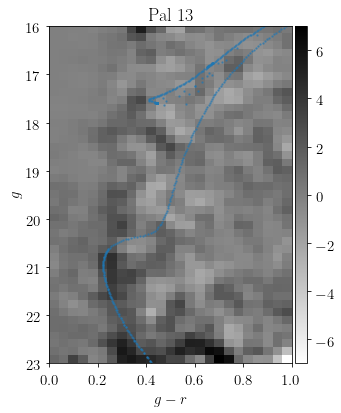

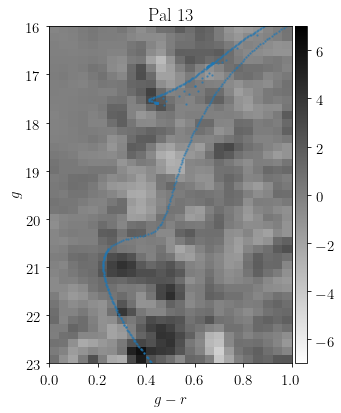

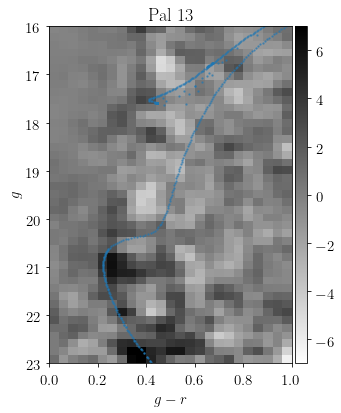

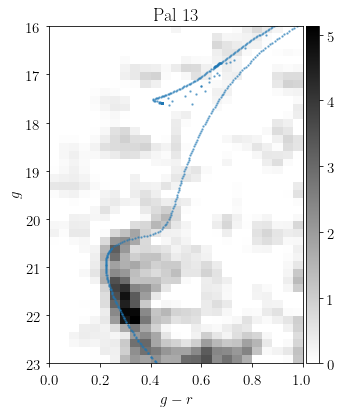

In [548]:
import plot_hess
reload(plot_hess)

width_on = 0.5
width_off = 0.5
separation = 1.0
off_min = separation - width_off / 2.
off_max = separation + width_off / 2.

dx = 0.04
dy = 0.1666
smoothing = 0.8 # 0.75

vmin, vmax = -7, 7
# vmin, vmax = None, None

xmin, xmax = -5, 0
sel_on = (phi1 > xmin) & (phi1 < xmax) & (np.abs(interp_track(phi1) - phi2) < width_on/2.)
sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min) # & (phi2 > 0)
sel_on &= ~glob_sel
ax, im = plot_hess.plot_hess( 'Pal\ 13', data[sel_on], data[sel_off], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=dx, dy=dy, no_bkg=False, smoothing=smoothing, vmin=vmin, vmax=vmax)
ax.scatter(iso.color, iso.mag+iso.distance_modulus, s=2, alpha=0.5)
ax.set_xlim(0, 1)
ax.set_ylim(23, 16)

xmin, xmax = 0, 5
sel_on = (phi1 > xmin) & (phi1 < xmax) & (np.abs(interp_track(phi1) - phi2) < width_on/2.)
sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min) # & (phi2 > 0)
sel_on &= ~glob_sel
ax, im = plot_hess.plot_hess( 'Pal\ 13', data[sel_on], data[sel_off], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=dx, dy=dy, no_bkg=False, smoothing=smoothing, vmin=vmin, vmax=vmax)
ax.scatter(iso.color, iso.mag+iso.distance_modulus, s=2, alpha=0.5)
ax.set_xlim(0, 1)
ax.set_ylim(23, 16)

xmin, xmax = -5, 5
sel_on = (phi1 > xmin) & (phi1 < xmax) & (np.abs(interp_track(phi1) - phi2) < width_on/2.)
sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min) # & (phi2 > 0)
sel_on &= ~glob_sel
weights = np.exp(phi2[sel_on])
# weights = None
ax, im = plot_hess.plot_hess( 'Pal\ 13', data[sel_on], data[sel_off], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=dx, dy=dy, no_bkg=False, smoothing=smoothing, vmin=vmin, vmax=vmax, weights=weights)
ax.scatter(iso.color, iso.mag+iso.distance_modulus, s=2, alpha=0.5)
ax.set_xlim(0, 1)
ax.set_ylim(23, 16)

sel_on = glob_sel
sel_off = glob_sel_off
ax, im = plot_hess.plot_hess( 'Pal\ 13', data[sel_on], data[sel_off], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=dx, dy=dy, no_bkg=False, smoothing=smoothing, vmin=0)
ax.scatter(iso.color, iso.mag+iso.distance_modulus, s=2, alpha=0.5)
ax.set_xlim(0, 1)
ax.set_ylim(23, 16)

plt.show()

dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666


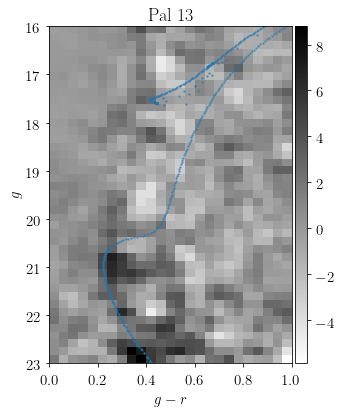

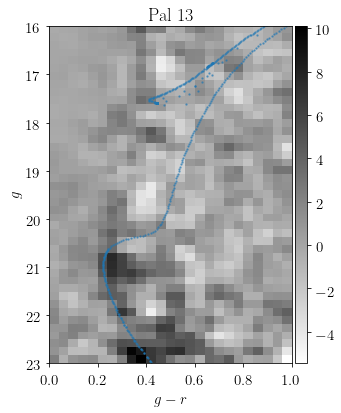

In [596]:
import plot_hess
reload(plot_hess)

width_on = 0.5
width_off = 0.5
separation = 1.0
off_min = separation - width_off / 2.
off_max = separation + width_off / 2.

# vmin, vmax = -5, 8
vmin, vmax = None, None

# for width_on in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
#     width_off = width_on

# xmin, xmax = -5, 5
# sel_on = (phi1 > xmin) & (phi1 < xmax) & (np.abs(interp_track(phi1) - phi2) < width_on/2.)
# sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)
# # sel_off &= (phi2 > 0)
# sel_on &= ~glob_sel
# weights = np.exp(phi2[sel_on])
# # weights = None
# ax, im = plot_hess.plot_hess( 'Pal\ 13', data[sel_on], data[sel_off], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04, dy=0.1666, no_bkg=False, smoothing=0.75, vmin=vmin, vmax=vmax, weights=weights)
# ax.scatter(iso.color, iso.mag+iso.distance_modulus, s=2, alpha=0.5)
# ax.set_xlim(0, 1)
# ax.set_ylim(23, 16)

xmin, xmax = -5, 5
sel_on = (phi1 > xmin) & (phi1 < xmax) & (np.abs(interp_track(phi1) - phi2) < width_on/2.)
sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)
# sel_off &= (phi2 > 0)
sel_on &= ~glob_sel
weights = np.exp(phi2[sel_on])
# weights = None
ax, im = plot_hess.plot_hess( 'Pal\ 13', data[sel_on], data[sel_off], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04, dy=0.1666, no_bkg=False, smoothing=0.75, vmin=vmin, vmax=vmax, weights=weights)
ax.scatter(iso.color, iso.mag+iso.distance_modulus, s=2, alpha=0.5)
ax.set_xlim(0, 1)
ax.set_ylim(23, 16)

xmin, xmax = -5, 5
sel_on = (phi1 > xmin) & (phi1 < xmax) & (np.abs(interp_track(phi1) - phi2) < width_on/2.)
sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)
# sel_off &= (phi2 > 0)
sel_on &= ~glob_sel
# weights = np.exp(phi2[sel_on])
weights = None
ax, im = plot_hess.plot_hess( 'Pal\ 13', data[sel_on], data[sel_off], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04, dy=0.1666, no_bkg=False, smoothing=0.75, vmin=vmin, vmax=vmax, weights=weights)
ax.scatter(iso.color, iso.mag+iso.distance_modulus, s=2, alpha=0.5)
ax.set_xlim(0, 1)
ax.set_ylim(23, 16)

# xmin, xmax = -5, 5
# sel_on = (phi1 > xmin) & (phi1 < xmax) & (np.abs(interp_track(phi1) - phi2) < width_on/2.)
# sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)
# sel_off &= (phi2 < 0)
# sel_on &= ~glob_sel
# weights = np.exp(phi2[sel_on])
# # weights = None
# ax, im = plot_hess.plot_hess( 'Pal\ 13', data[sel_on], data[sel_off], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04, dy=0.1666, no_bkg=False, smoothing=0.75, vmin=vmin, vmax=vmax, weights=weights)
# ax.scatter(iso.color, iso.mag+iso.distance_modulus, s=2, alpha=0.5)
# ax.set_xlim(0, 1)
# ax.set_ylim(23, 16)

plt.show()

dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666


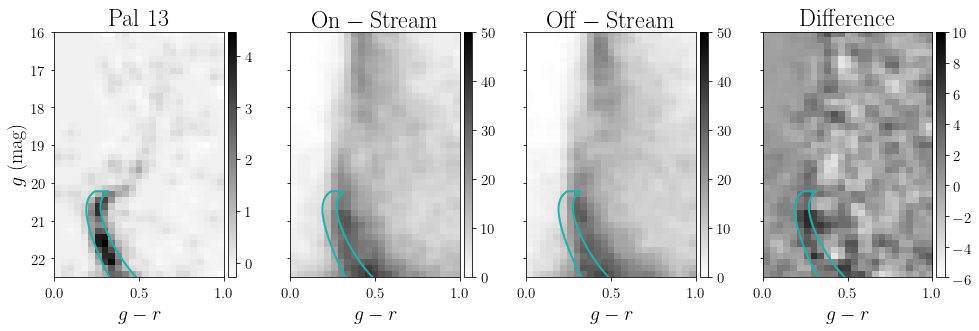

In [1133]:
from matplotlib.patches import PathPatch

plot_density.plot_pretty(fontsize=20)

mu, age, z = 16.6, 11.0, 0.001
iso = filter_data.isochrone_factory('Dotter', survey='DES', age=age, distance_modulus=mu, z=z)

C = [0.01, 0.05]
E = 3.  
dmu = 0.5
gmin = 20.2
mk = filter_data.mkpol(mu=mu, age=age, z=z, dmu=dmu, C=C, E=E, err=err, survey='DECaLS', clip=gmin)
mk[:,1] += mu


width_on = 0.5
width_off = 0.5
separation = 1.0
off_min = separation - width_off / 2.
off_max = separation + width_off / 2.

data = fitsio.open('../data/cutouts/Pal13.fits.gz')[1].data
phi1, phi2 = rotation_matrix.phi12_rotmat(data['ra'], data['dec'], R)

sep = angsep(data['ra'], data['dec'], ra_pal13, dec_pal13)
glob_sel = sep < 0.1 # r_pal13 # 0.4 # < 0.1

# ra_off, dec_off = ra_pal13 - 2.0, dec_pal13 - 2.0
phi1_off, phi2_off = 0, 2
# sep = angsep(data['ra'], data['dec'], ra_off, dec_off)
sep1 = angsep(phi1, phi2, 0, 2)
sep2 = angsep(phi1, phi2, 0, -2)
glob_sel_off = (sep1 < 0.1) | (sep2 < 0.1) # r_pal13 # 0.4 # < 0.1


reload(plot_hess)
vmin, vmax = None, None

fig, ax = plt.subplots(1,4, figsize=(14, 5), sharey=True)
fig.tight_layout()

sel_on = glob_sel
sel_off = glob_sel_off
im1 = plot_hess.plot_hess2( 'Pal\ 13', data[sel_on], data[sel_off], ax=ax[0], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=vmin, vmax=vmax, weights=weights)

############

sep = angsep(data['ra'], data['dec'], ra_pal13, dec_pal13)
glob_sel = sep < 0.4 # r_pal13 # 0.4 # < 0.1

sep1 = angsep(phi1, phi2, 0, 2)
sep2 = angsep(phi1, phi2, 0, -2)
glob_sel_off = (sep1 < 0.4) | (sep2 < 0.4)

xmin, xmax = -5, 5
sel_on = (phi1 > xmin) & (phi1 < xmax) & (np.abs(interp_track(phi1) - phi2) < width_on/2.)
sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)
sel_on &= ~glob_sel
sel_off &= ~glob_sel
sel_off &= phi2 > 0
weights = None

im2 = plot_hess.plot_hess2( 'On-Stream', data[sel_on], None, ax=ax[1], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=0, vmax=50, weights=weights)
im3= plot_hess.plot_hess2( 'Off-Stream', data[sel_off], None, ax=ax[2], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=0, vmax=50, weights=weights)
sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)

np.save('../data/Pal13_onstream.npy', data[sel_on])
np.save('../data/Pal13_offstream.npy', data[sel_off])
im4 = plot_hess.plot_hess2( 'Difference', data[sel_on], data[sel_off], ax=ax[3], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=-6, vmax=10, weights=weights)

plot_hess.colorbar(im1)
plot_hess.colorbar(im2)
plot_hess.colorbar(im3)
plot_hess.colorbar(im4)

plt.subplots_adjust(wspace=0, hspace=0)

for axi in ax:
    axi.set_xlabel(r'$g - r$')
#     axi.scatter(iso.color, iso.mag+16.8, c='lightseagreen', s=1, alpha=1.)
#     axi.scatter(iso.color, iso.mag+16.6, c='b', s=1, alpha=0.4)
    axi.plot(mk[:,0], mk[:,1], c='lightseagreen', lw=2)
    axi.set_xlim(0,1)
    axi.set_ylim(22.5, 16)
ax[0].set_ylabel(r'$g\ \mathrm{(mag)}$')

plt.savefig('../plots/Pal13/Paper/Pal13_CMD_2.png')
# cbar = plot_hess.colorbar(im)
# cbar.set_label(r'$\mathrm{Counts}$')

dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666


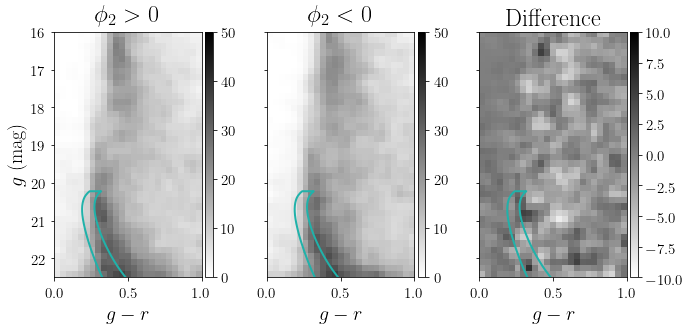

In [1014]:
from matplotlib.patches import PathPatch

plot_density.plot_pretty(fontsize=20)

mu, age, z = 16.6, 11.0, 0.001
iso = filter_data.isochrone_factory('Dotter', survey='DES', age=age, distance_modulus=mu, z=z)

C = [0.01, 0.05]
E = 3.  
dmu = 0.5
gmin = 20.2
mk = filter_data.mkpol(mu=mu, age=age, z=z, dmu=dmu, C=C, E=E, err=err, survey='DECaLS', clip=gmin)
mk[:,1] += mu


width_on = 0.5
width_off = 0.5
separation = 1.0
off_min = separation - width_off / 2.
off_max = separation + width_off / 2.

data = fitsio.open('../data/cutouts/Pal13.fits.gz')[1].data
phi1, phi2 = rotation_matrix.phi12_rotmat(data['ra'], data['dec'], R)

sep = angsep(data['ra'], data['dec'], ra_pal13, dec_pal13)
glob_sel = sep < 0.1 # r_pal13 # 0.4 # < 0.1

# ra_off, dec_off = ra_pal13 - 2.0, dec_pal13 - 2.0
phi1_off, phi2_off = 0, 2
# sep = angsep(data['ra'], data['dec'], ra_off, dec_off)
sep1 = angsep(phi1, phi2, 0, 2)
sep2 = angsep(phi1, phi2, 0, -2)
glob_sel_off = (sep1 < 0.1) | (sep2 < 0.1) # r_pal13 # 0.4 # < 0.1


reload(plot_hess)
vmin, vmax = None, None

fig, ax = plt.subplots(1,3, figsize=(10, 5), sharey=True)
fig.tight_layout()

xmin, xmax = -5, 5
sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)
sel_off1 = sel_off & (phi2 > 0)
sel_off2 = sel_off & (phi2 < 0)
weights = None

im1 = plot_hess.plot_hess2( '\phi_2 > 0', data[sel_off1], None, ax=ax[0], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=0, vmax=50, weights=weights)
im2= plot_hess.plot_hess2( '\phi_2 < 0', data[sel_off2], None, ax=ax[1], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=0, vmax=50, weights=weights)
im3= plot_hess.plot_hess2( 'Difference', data[sel_off1], data[sel_off2], ax=ax[2], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=-10, vmax=10, weights=weights)

plot_hess.colorbar(im1)
plot_hess.colorbar(im2)
plot_hess.colorbar(im3)

plt.subplots_adjust(wspace=0, hspace=0)

for axi in ax:
    axi.set_xlabel(r'$g - r$')
#     axi.scatter(iso.color, iso.mag+16.8, c='lightseagreen', s=1, alpha=1.)
#     axi.scatter(iso.color, iso.mag+16.6, c='b', s=1, alpha=0.4)
    axi.plot(mk[:,0], mk[:,1], c='lightseagreen', lw=2)
    axi.set_xlim(0,1)
    axi.set_ylim(22.5, 16)
ax[0].set_ylabel(r'$g\ \mathrm{(mag)}$')

plt.savefig('../plots/Pal13/Paper/Pal13_CMD_offstream.png')

dx, dy =  0.02 0.0833
dx, dy =  0.02 0.0833
dx, dy =  0.02 0.0833
dx, dy =  0.02 0.0833


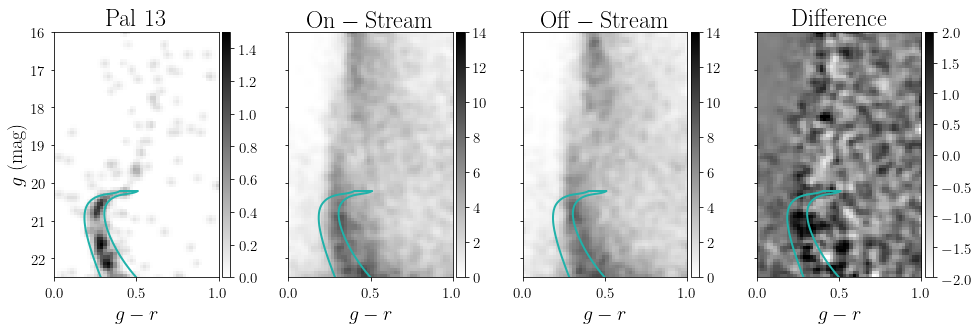

In [994]:
from matplotlib.patches import PathPatch
reload(filter_data)

plot_density.plot_pretty(fontsize=20)

mu, age, z = 16.8, 11.0, 0.001
C = [0.01, 0.075]
E = 4.  
dmu = 0.5
gmin = 20.2
mk = filter_data.mkpol(mu=mu, age=age, z=z, dmu=dmu, C=C, E=E, err=err, survey='DECaLS', clip=gmin)
mk[:,1] += mu
path = Path(mk)
# patch = PathPatch(path, color='lightseagreen', lw=2, fc='none')


width_on = 0.5
width_off = 0.5
separation = 1.0
off_min = separation - width_off / 2.
off_max = separation + width_off / 2.

data = fitsio.open('../data/cutouts/Pal13.fits.gz')[1].data
phi1, phi2 = rotation_matrix.phi12_rotmat(data['ra'], data['dec'], R)

sep = angsep(data['ra'], data['dec'], ra_pal13, dec_pal13)
glob_sel = sep < 0.1 # r_pal13 # 0.4 # < 0.1

# ra_off, dec_off = ra_pal13 - 2.0, dec_pal13 - 2.0
phi1_off, phi2_off = 0, 2
# sep = angsep(data['ra'], data['dec'], ra_off, dec_off)
sep1 = angsep(phi1, phi2, 0, 2)
sep2 = angsep(phi1, phi2, 0, -2)
glob_sel_off = (sep1 < 0.1) | (sep2 < 0.1) # r_pal13 # 0.4 # < 0.1


reload(plot_hess)
vmin, vmax = None, None

fig, ax = plt.subplots(1,4, figsize=(14, 5), sharey=True)
fig.tight_layout()

sel_on = glob_sel
sel_off = glob_sel_off
im1 = plot_hess.plot_hess2( 'Pal\ 13', data[sel_on], data[sel_off], ax=ax[0], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04/2, dy=0.1666/2, smoothing=1.0, vmin=0, vmax=1.5, weights=weights)

############

sep = angsep(data['ra'], data['dec'], ra_pal13, dec_pal13)
glob_sel = sep < 0.4 # r_pal13 # 0.4 # < 0.1

sep1 = angsep(phi1, phi2, 0, 2)
sep2 = angsep(phi1, phi2, 0, -2)
glob_sel_off = (sep1 < 0.4) | (sep2 < 0.4)

xmin, xmax = -5, 5
sel_on = (phi1 > xmin) & (phi1 < xmax) & (np.abs(interp_track(phi1) - phi2) < width_on/2.)
sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)
sel_on &= ~glob_sel
sel_off &= ~glob_sel
sel_off &= phi2 > 0
weights = None

im2 = plot_hess.plot_hess2( 'On-Stream', data[sel_on], None, ax=ax[1], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04/2, dy=0.1666/2, smoothing=1.0, vmin=0, vmax=14, weights=weights)
im3= plot_hess.plot_hess2( 'Off-Stream', data[sel_off], None, ax=ax[2], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04/2, dy=0.1666/2, smoothing=1.0, vmin=0, vmax=14, weights=weights)
sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)

np.save('../data/Pal13_onstream.npy', data[sel_on])
np.save('../data/Pal13_offstream.npy', data[sel_off])
im4 = plot_hess.plot_hess2( 'Difference', data[sel_on], data[sel_off], ax=ax[3], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04/2, dy=0.1666/2, smoothing=1.0, vmin=-2, vmax=2, weights=weights)

plot_hess.colorbar(im1)
plot_hess.colorbar(im2)
plot_hess.colorbar(im3)
plot_hess.colorbar(im4)

plt.subplots_adjust(wspace=0, hspace=0)

for axi in ax:
    axi.set_xlabel(r'$g - r$')
#     axi.scatter(iso.color, iso.mag+16.8, c='lightseagreen', s=1, alpha=1.)
#     axi.scatter(iso.color, iso.mag+16.6, c='b', s=1, alpha=0.4)
    # patch = PathPatch(path, color='lightseagreen', lw=2, fc='none')
    # axi.add_artist(patch)
    axi.plot(mk[:,0], mk[:,1], c='lightseagreen', lw=2)
    axi.set_xlim(0,1)
    axi.set_ylim(22.5, 16)
ax[0].set_ylabel(r'$g\ \mathrm{(mag)}$')

plt.savefig('../plots/Pal13/Paper/Pal13_CMD_smallbins.png')
# cbar = plot_hess.colorbar(im)
# cbar.set_label(r'$\mathrm{Counts}$')

In [981]:
mk[:,1].min(), mk[:,1].max(), mk[:,0].min(), mk[:,0].max()

(20.213294, 22.987979000000003, -0.672707264529516, 0.5931575859715353)

In [948]:
datoff = np.load('../data/Pal13_onstream.npy')
phi1, phi2 = rotation_matrix.phi12_rotmat(datoff['RA'], datoff['DEC'], R)
print(phi1.max(), phi2.min()-phi2.max())

datoff = np.load('../data/Pal13_offstream.npy')
phi1, phi2 = rotation_matrix.phi12_rotmat(datoff['RA'], datoff['DEC'], R)
print(phi1.max(), np.abs(phi2).min()-np.abs(phi2).max())

4.9991915886359255 -0.8013412175895169
4.999949061283944 -0.8087463672860488


In [936]:
angsep(ends[0][0], ends[0][1], ra_pal13, dec_pal13), angsep(ends[1][0], ends[1][1], ra_pal13, dec_pal13), angsep(ends[0][0], ends[0][1], ends[1][0], ends[1][1])

(5.758165259259155, 4.246577983344555, 9.998642903491271)

In [932]:
iso.z2feh(0.001)

-1.1718705109663325

dx, dy =  0.02 0.0833


(23, 16)

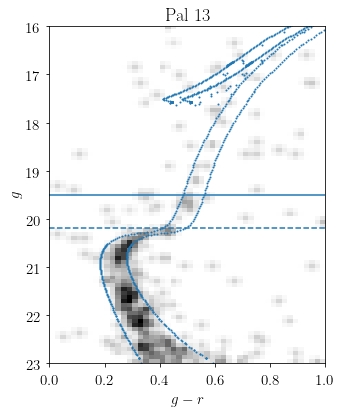

In [924]:
data = fitsio.open('../data/cutouts/Pal13.fits.gz')[1].data
phi1, phi2 = rotation_matrix.phi12_rotmat(data['ra'], data['dec'], R)

# mu, age, z = 16.6, 12.0, 0.001
mu, age, z = 16.8, 11.0, 0.001
C = [0.01, 0.05]
E = 4.  
dmu = 0.5
gmin = 20.2
mk = filter_data.mkpol(mu=mu, age=age, z=z, dmu=dmu, C=C, E=E, err=err, survey='DECaLS')

sep = angsep(data['ra'], data['dec'], ra_pal13, dec_pal13)
glob_sel = sep < 0.1 # r_pal13 # 0.4 # < 0.1

# ra_off, dec_off = ra_pal13 - 2.0, dec_pal13 - 2.0
phi1_off, phi2_off = 0, 2
# sep = angsep(data['ra'], data['dec'], ra_off, dec_off)
sep1 = angsep(phi1, phi2, 0, 2)
sep2 = angsep(phi1, phi2, 0, -2)
glob_sel_off = (sep1 < 0.1) | (sep2 < 0.1) # r_pal13 # 0.4 # < 0.1

sel_on = glob_sel
sel_off = glob_sel_off
out = plot_hess.plot_hess( 'Pal\ 13', data[sel_on], data[sel_off], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04/2, dy=0.1666/2, smoothing=0.75, weights=weights, vmin=0)


plt.scatter(mk[:,0], mk[:,1]+mu, s=1)
plt.axhline(19.5)
plt.axhline(gmin, ls='--')
plt.xlim(0, 1)
plt.ylim(23, 16)

dx, dy =  0.02 0.0833


(23, 16)

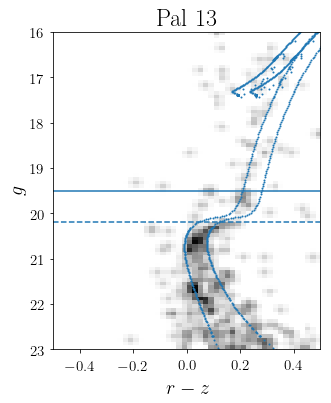

In [1016]:
data = fitsio.open('../data/cutouts/Pal13.fits.gz')[1].data
# phi1, phi2 = rotation_matrix.phi12_rotmat(data['ra'], data['dec'], R)

reload(plot_hess)
reload(filter_data)

# mu, age, z = 16.6, 12.0, 0.001
# C = [0.05, 0.05]
# E = 2.  
mk = filter_data.mkpol_grz(mu=mu, age=age, z=z, dmu=0.5, C=C, E=E, err=err, survey='DECaLS')

sep = angsep(data['ra'], data['dec'], ra_pal13, dec_pal13)
glob_sel = sep < 0.1 # r_pal13 # 0.4 # < 0.1

# ra_off, dec_off = ra_pal13 - 2.0, dec_pal13 - 2.0
phi1_off, phi2_off = 0, 2
# sep = angsep(data['ra'], data['dec'], ra_off, dec_off)
sep1 = angsep(phi1, phi2, 0, 2)
sep2 = angsep(phi1, phi2, 0, -2)
glob_sel_off = (sep1 < 0.1) | (sep2 < 0.1) # r_pal13 # 0.4 # < 0.1

sel_on = glob_sel
sel_off = glob_sel_off
out = plot_hess.plot_hess_grz( 'Pal\ 13', data[sel_on], data[sel_off], gband='MAG_SFD_G', rband='MAG_SFD_R', zband='MAG_SFD_Z', gmax=23, dx=0.04/2, dy=0.1666/2, smoothing=0.75, weights=weights, grmin=-0.5, grmax=0.5, vmin=0)


plt.scatter(mk[:,0], mk[:,1]+mu, s=1)
plt.axhline(19.5)
plt.axhline(gmin, ls='--')
plt.xlim(-0.5, 0.5)
plt.ylim(23, 16)

# Test Dust Maps

In [1118]:
from dustmaps.planck import PlanckQuery

G_coeff, R_coeff, Z_coeff = 3.214, 2.165, 1.592
# G_coeff, R_coeff, Z_coeff = 3.186, 2.140, 1.196

In [1119]:
data = fitsio.open('../data/Pal13_2.fits.gz')[1].data

In [1069]:
coords = SkyCoord(data['ra'], data['dec'], unit='deg', frame='icrs')
planck = PlanckQuery()
ebv = planck(coords)

In [1120]:
from dustmaps.sfd import SFDQuery
sfd = SFDQuery()
ebv_sfd = sfd(coords)

mag_sfdnew_g = data['MAG_G']-ebv_sfd*G_coeff
mag_sfdnew_r = data['MAG_R']-ebv_sfd*R_coeff
mag_sfdnew_z = data['MAG_Z']-ebv_sfd*Z_coeff

In [1121]:
mag_planck_g = data['MAG_G']-ebv*G_coeff
mag_planck_r = data['MAG_R']-ebv*R_coeff
mag_planck_z = data['MAG_Z']-ebv*Z_coeff

In [1122]:
new_dtype = np.dtype(data.dtype.descr + [('MAG_PLANCK_G', '>f8'), ('MAG_PLANCK_R', '>f8'), ('MAG_PLANCK_Z', '>f8'),
                                         ('MAG_SFDNEW_G', '>f8'), ('MAG_SFDNEW_R', '>f8'), ('MAG_SFDNEW_Z', '>f8')])
new_data = np.zeros(data.shape, dtype=new_dtype)

for descr in data.dtype.descr:
    new_data[descr[0]] = data[descr[0]]

new_data['MAG_PLANCK_G'] = mag_planck_g
new_data['MAG_PLANCK_R'] = mag_planck_r
new_data['MAG_PLANCK_Z'] = mag_planck_z

new_data['MAG_SFDNEW_G'] = mag_sfdnew_g
new_data['MAG_SFDNEW_R'] = mag_sfdnew_r
new_data['MAG_SFDNEW_Z'] = mag_sfdnew_z

data = new_data

In [1115]:
data

array([(349.991, 23.481, 0, 18.327, 17.78 , 17.565, 18.098, 17.625, 17.479, 18.086, 17.617, 17.475, 18.1  , 17.627, 17.48 ),
       (349.997, 23.519, 0, 20.864, 20.175, 19.851, 20.624, 20.013, 19.76 , 20.607, 20.002, 19.754, 20.626, 20.015, 19.761),
       (349.96 , 23.522, 0, 18.229, 17.176, 16.637, 17.983, 17.011, 16.545, 17.967, 17.   , 16.539, 17.985, 17.012, 16.546),
       ...,
       (345.916,  2.353, 0, 23.259, 22.48 , 21.988, 23.059, 22.345, 21.913, 23.009, 22.312, 21.894, 23.061, 22.347, 21.913),
       (345.914,  2.365, 0, 21.499, 21.147, 21.046, 21.3  , 21.013, 20.971, 21.249, 20.979, 20.952, 21.301, 21.015, 20.972),
       (345.923,  2.369, 0, 21.272, 20.507, 20.124, 21.076, 20.374, 20.05 , 21.037, 20.349, 20.036, 21.078, 20.376, 20.051)],
      dtype=[('RA', '>f8'), ('DEC', '>f8'), ('EXTENDED_CLASS', '>i8'), ('MAG_G', '>f4'), ('MAG_R', '>f4'), ('MAG_Z', '>f4'), ('MAG_SFD_G', '>f4'), ('MAG_SFD_R', '>f4'), ('MAG_SFD_Z', '>f4'), ('MAG_PLANCK_G', '>f8'), ('MAG_PLANCK_R', '>f8

dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666


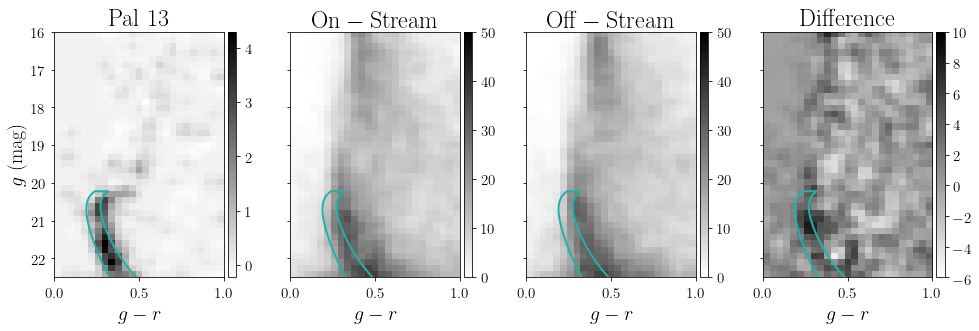

In [1134]:
from matplotlib.patches import PathPatch

plot_density.plot_pretty(fontsize=20)

mu, age, z = 16.6, 11.0, 0.001
iso = filter_data.isochrone_factory('Dotter', survey='DES', age=age, distance_modulus=mu, z=z)

C = [0.01, 0.05]
E = 3.  
dmu = 0.5
gmin = 20.2
mk = filter_data.mkpol(mu=mu, age=age, z=z, dmu=dmu, C=C, E=E, err=err, survey='DECaLS', clip=gmin)
mk[:,1] += mu


width_on = 0.5
width_off = 0.5
separation = 1.0
off_min = separation - width_off / 2.
off_max = separation + width_off / 2.

# data = fitsio.open('../data/cutouts/Pal13.fits.gz')[1].data
data = np.copy(new_data)
phi1, phi2 = rotation_matrix.phi12_rotmat(data['RA'], data['DEC'], R)

sep = angsep(data['RA'], data['DEC'], ra_pal13, dec_pal13)
glob_sel = sep < 0.1 # r_pal13 # 0.4 # < 0.1

# ra_off, dec_off = ra_pal13 - 2.0, dec_pal13 - 2.0
phi1_off, phi2_off = 0, 2
# sep = angsep(data['RA'], data['DEC'], ra_off, dec_off)
sep1 = angsep(phi1, phi2, 0, 2)
sep2 = angsep(phi1, phi2, 0, -2)
glob_sel_off = (sep1 < 0.1) | (sep2 < 0.1) # r_pal13 # 0.4 # < 0.1


reload(plot_hess)
vmin, vmax = None, None

fig, ax = plt.subplots(1,4, figsize=(14, 5), sharey=True)
fig.tight_layout()

sel_on = glob_sel
sel_off = glob_sel_off
im1 = plot_hess.plot_hess2( 'Pal\ 13', data[sel_on], data[sel_off], ax=ax[0], gband='MAG_PLANCK_G', rband='MAG_PLANCK_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=vmin, vmax=vmax, weights=weights)

############

sep = angsep(data['RA'], data['DEC'], ra_pal13, dec_pal13)
glob_sel = sep < 0.4 # r_pal13 # 0.4 # < 0.1

sep1 = angsep(phi1, phi2, 0, 2)
sep2 = angsep(phi1, phi2, 0, -2)
glob_sel_off = (sep1 < 0.4) | (sep2 < 0.4)

xmin, xmax = -5, 5
sel_on = (phi1 > xmin) & (phi1 < xmax) & (np.abs(interp_track(phi1) - phi2) < width_on/2.)
sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)
sel_on &= ~glob_sel
sel_off &= ~glob_sel
sel_off &= phi2 > 0
weights = None

im2 = plot_hess.plot_hess2( 'On-Stream', data[sel_on], None, ax=ax[1], gband='MAG_PLANCK_G', rband='MAG_PLANCK_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=0, vmax=50, weights=weights)
im3= plot_hess.plot_hess2( 'Off-Stream', data[sel_off], None, ax=ax[2], gband='MAG_PLANCK_G', rband='MAG_PLANCK_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=0, vmax=50, weights=weights)
sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)

# np.save('../data/Pal13_onstream.npy', data[sel_on])
# np.save('../data/Pal13_offstream.npy', data[sel_off])
im4 = plot_hess.plot_hess2( 'Difference', data[sel_on], data[sel_off], ax=ax[3], gband='MAG_PLANCK_G', rband='MAG_PLANCK_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=-6, vmax=10, weights=weights)

plot_hess.colorbar(im1)
plot_hess.colorbar(im2)
plot_hess.colorbar(im3)
plot_hess.colorbar(im4)

plt.subplots_adjust(wspace=0, hspace=0)

for axi in ax:
    axi.set_xlabel(r'$g - r$')
#     axi.scatter(iso.color, iso.mag+16.8, c='lightseagreen', s=1, alpha=1.)
#     axi.scatter(iso.color, iso.mag+16.6, c='b', s=1, alpha=0.4)
    axi.plot(mk[:,0], mk[:,1], c='lightseagreen', lw=2)
    axi.set_xlim(0,1)
    axi.set_ylim(22.5, 16)
ax[0].set_ylabel(r'$g\ \mathrm{(mag)}$')

plt.savefig('../plots/Pal13/Paper/Pal13_CMD_Planck.png')
# cbar = plot_hess.colorbar(im)
# cbar.set_label(r'$\mathrm{Counts}$')

dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666


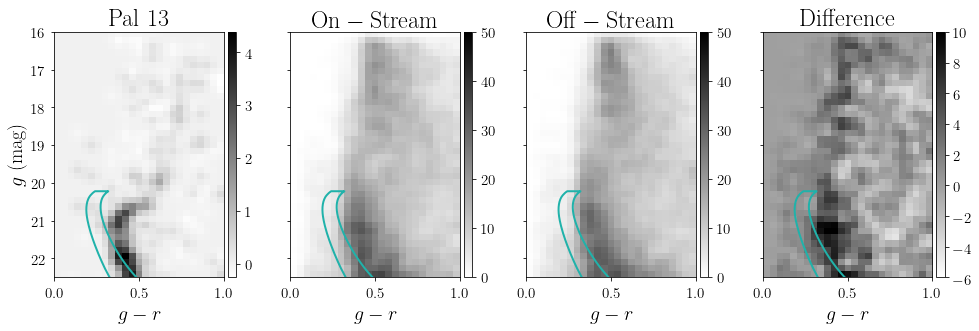

In [1137]:
from matplotlib.patches import PathPatch

plot_density.plot_pretty(fontsize=20)

mu, age, z = 16.6, 11.0, 0.001
iso = filter_data.isochrone_factory('Dotter', survey='DES', age=age, distance_modulus=mu, z=z)

C = [0.01, 0.05]
E = 3.  
dmu = 0.5
gmin = 20.2
mk = filter_data.mkpol(mu=mu, age=age, z=z, dmu=dmu, C=C, E=E, err=err, survey='DECaLS', clip=gmin)
mk[:,1] += mu


width_on = 0.5
width_off = 0.5
separation = 1.0
off_min = separation - width_off / 2.
off_max = separation + width_off / 2.

# data = fitsio.open('../data/cutouts/Pal13.fits.gz')[1].data
data = np.copy(new_data)
phi1, phi2 = rotation_matrix.phi12_rotmat(data['RA'], data['DEC'], R)

sep = angsep(data['RA'], data['DEC'], ra_pal13, dec_pal13)
glob_sel = sep < 0.1 # r_pal13 # 0.4 # < 0.1

# ra_off, dec_off = ra_pal13 - 2.0, dec_pal13 - 2.0
phi1_off, phi2_off = 0, 2
# sep = angsep(data['RA'], data['DEC'], ra_off, dec_off)
sep1 = angsep(phi1, phi2, 0, 2)
sep2 = angsep(phi1, phi2, 0, -2)
glob_sel_off = (sep1 < 0.1) | (sep2 < 0.1) # r_pal13 # 0.4 # < 0.1


reload(plot_hess)
vmin, vmax = None, None

fig, ax = plt.subplots(1,4, figsize=(14, 5), sharey=True)
fig.tight_layout()

sel_on = glob_sel
sel_off = glob_sel_off
im1 = plot_hess.plot_hess2( 'Pal\ 13', data[sel_on], data[sel_off], ax=ax[0], gband='MAG_G', rband='MAG_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=vmin, vmax=vmax, weights=weights)

############

sep = angsep(data['RA'], data['DEC'], ra_pal13, dec_pal13)
glob_sel = sep < 0.4 # r_pal13 # 0.4 # < 0.1

sep1 = angsep(phi1, phi2, 0, 2)
sep2 = angsep(phi1, phi2, 0, -2)
glob_sel_off = (sep1 < 0.4) | (sep2 < 0.4)

xmin, xmax = -5, 5
sel_on = (phi1 > xmin) & (phi1 < xmax) & (np.abs(interp_track(phi1) - phi2) < width_on/2.)
sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)
sel_on &= ~glob_sel
sel_off &= ~glob_sel
sel_off &= phi2 > 0
weights = None

im2 = plot_hess.plot_hess2( 'On-Stream', data[sel_on], None, ax=ax[1], gband='MAG_G', rband='MAG_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=0, vmax=50, weights=weights)
im3= plot_hess.plot_hess2( 'Off-Stream', data[sel_off], None, ax=ax[2], gband='MAG_G', rband='MAG_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=0, vmax=50, weights=weights)
sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)

# np.save('../data/Pal13_onstream.npy', data[sel_on])
# np.save('../data/Pal13_offstream.npy', data[sel_off])
im4 = plot_hess.plot_hess2( 'Difference', data[sel_on], data[sel_off], ax=ax[3], gband='MAG_G', rband='MAG_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=-6, vmax=10, weights=weights)

plot_hess.colorbar(im1)
plot_hess.colorbar(im2)
plot_hess.colorbar(im3)
plot_hess.colorbar(im4)

plt.subplots_adjust(wspace=0, hspace=0)

for axi in ax:
    axi.set_xlabel(r'$g - r$')
#     axi.scatter(iso.color, iso.mag+16.8, c='lightseagreen', s=1, alpha=1.)
#     axi.scatter(iso.color, iso.mag+16.6, c='b', s=1, alpha=0.4)
    axi.plot(mk[:,0], mk[:,1], c='lightseagreen', lw=2)
    axi.set_xlim(0,1)
    axi.set_ylim(22.5, 16)
ax[0].set_ylabel(r'$g\ \mathrm{(mag)}$')

plt.savefig('../plots/Pal13/Paper/Pal13_CMD_noebv.png')
# cbar = plot_hess.colorbar(im)
# cbar.set_label(r'$\mathrm{Counts}$')

In [1076]:
sep = angsep(data['RA'], data['DEC'], ra_pal13, dec_pal13)
glob_sel = sep < 0.4 # r_pal13 # 0.4 # < 0.1


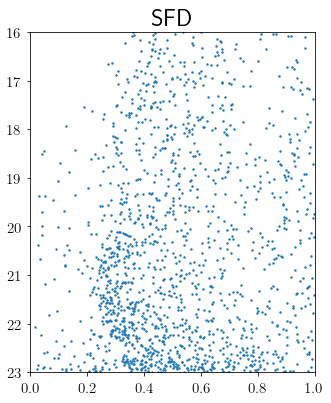

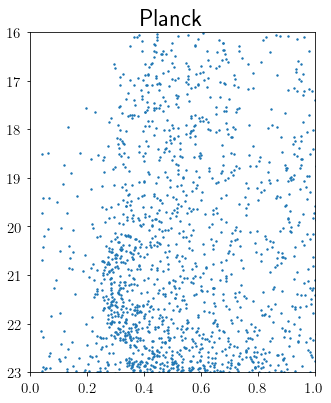

In [1141]:
plot_density.plot_pretty(fontsize=20)
plt.figure(figsize=(5,6))
plt.scatter(data['MAG_SFD_G'][glob_sel]-data['MAG_SFD_R'][glob_sel], data['MAG_SFD_G'][glob_sel], s=2, alpha=1.0)
plt.xlim(0,1)
plt.ylim(23, 16)
plt.title('SFD')
plt.savefig('../plots/Pal13/cluster_scatter_sfd.png')

plt.figure(figsize=(5,6))
plt.scatter(data['MAG_PLANCK_G'][glob_sel]-data['MAG_PLANCK_R'][glob_sel], data['MAG_PLANCK_G'][glob_sel], s=2, alpha=1.0)
plt.xlim(0,1)
plt.ylim(23, 16)
plt.title('Planck')
plt.savefig('../plots/Pal13/cluster_scatter_planck.png')
plt.show()

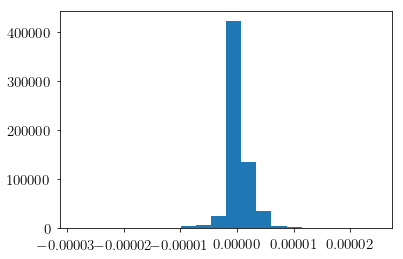

In [1128]:
plt.figure(figsize=(6,4))
plt.hist(data['MAG_SFDNEW_G']-data['MAG_SFD_G'], bins=20)
plt.show()